Importing libraries and intial data cleaning

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from cliffs_delta import cliffs_delta
from scipy.stats import kruskal
from scipy.stats import levene
from scipy.stats import chi2_contingency
from scipy.stats import shapiro
from scipy.stats import mannwhitneyu
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import root_mean_squared_error, r2_score
from sklearn.preprocessing import StandardScaler
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.decomposition import PCA
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, roc_auc_score, confusion_matrix, roc_curve


In [368]:
random_seed = np.random.seed(9542) # Mason Lonoff

In [369]:
df = pd.read_csv("rmpCapstoneTags.csv", header = None)

df.columns = ["Tough Grader","Good Feedback", "Respected", "Lots to read", "Participation matters", 
"Don't skip class or you won't pass", "Lots of homework", "Inspirational", "Pop quizzes", "Accessible", 
"So many papers", "Clear grading", "Hilarious", "Test heavy", "Graded by a few things", "Amazing lectures", "Caring", 
"Extra credit", "Group projects", "Lecture heavy"]

df_full = df.copy()

In [370]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 89893 entries, 0 to 89892
Data columns (total 20 columns):
 #   Column                              Non-Null Count  Dtype
---  ------                              --------------  -----
 0   Tough Grader                        89893 non-null  int64
 1   Good Feedback                       89893 non-null  int64
 2   Respected                           89893 non-null  int64
 3   Lots to read                        89893 non-null  int64
 4   Participation matters               89893 non-null  int64
 5   Don't skip class or you won't pass  89893 non-null  int64
 6   Lots of homework                    89893 non-null  int64
 7   Inspirational                       89893 non-null  int64
 8   Pop quizzes                         89893 non-null  int64
 9   Accessible                          89893 non-null  int64
 10  So many papers                      89893 non-null  int64
 11  Clear grading                       89893 non-null  int64
 12  Hila

In [371]:
df.describe()

,Tough Grader,Good Feedback,Respected,Lots to read,Participation matters,Don't skip class or you won't pass,Lots of homework,Inspirational,Pop quizzes,Accessible,So many papers,Clear grading,Hilarious,Test heavy,Graded by a few things,Amazing lectures,Caring,Extra credit,Group projects,Lecture heavy
count,89893.000000,89893.000000,89893.000000,89893.000000,89893.000000,89893.000000,89893.000000,89893.000000,89893.000000,89893.000000,89893.000000,89893.000000,89893.000000,89893.000000,89893.000000,89893.000000,89893.000000,89893.000000,89893.000000,89893.000000
mean,0.753763,1.004605,0.698920,0.571646,0.686783,0.656948,0.599724,0.441892,0.141146,0.277352,0.112968,0.550788,0.498726,0.126194,0.118140,0.483764,0.855728,0.402668,0.204198,0.394925
std,1.985588,2.485230,2.123465,1.625783,1.754998,1.803096,1.798637,1.604895,0.797579,1.038501,0.550803,1.464685,2.063489,0.693769,0.501115,1.807547,2.158969,1.660895,0.949802,1.189545
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000
max,112.000000,171.000000,186.000000,82.000000,82.000000,110.000000,141.000000,119.000000,97.000000,63.000000,64.000000,77.000000,224.000000,81.000000,39.000000,136.000000,127.000000,128.000000,92.000000,38.000000


In [372]:
df.isnull().sum()

Tough Grader                          0
Good Feedback                         0
Respected                             0
Lots to read                          0
Participation matters                 0
Don't skip class or you won't pass    0
Lots of homework                      0
Inspirational                         0
Pop quizzes                           0
Accessible                            0
So many papers                        0
Clear grading                         0
Hilarious                             0
Test heavy                            0
Graded by a few things                0
Amazing lectures                      0
Caring                                0
Extra credit                          0
Group projects                        0
Lecture heavy                         0
dtype: int64

In [373]:
df2 = pd.read_csv("rmpCapstoneNum.csv", header = None)


df2.columns = ["Average Rating", "Average Difficulty", "Number of ratings", "Received a 'pepper'?", "Proportion of students who said they would take the class again", "Number of ratings from online classes", "Male", "Female"]

df2_full = df2.copy()

df2

,Average Rating,Average Difficulty,Number of ratings,Received a 'pepper'?,Proportion of students who said they would take the class again,Number of ratings from online classes,Male,Female
0,5.0,1.5,2.0,0.0,NaN,0.0,0,1
1,NaN,NaN,NaN,NaN,NaN,NaN,0,0
2,3.2,3.0,4.0,0.0,NaN,0.0,1,0
3,3.6,3.5,10.0,1.0,NaN,0.0,0,0
4,1.0,5.0,1.0,0.0,NaN,0.0,0,0
...,...,...,...,...,...,...,...,...
89888,2.5,2.5,2.0,0.0,NaN,0.0,0,0
89889,4.5,2.0,2.0,0.0,NaN,0.0,1,0
89890,5.0,1.7,6.0,1.0,100.0,2.0,1,0
89891,3.6,1.8,5.0,0.0,NaN,0.0,0,0


In [374]:
df2.describe()

,Average Rating,Average Difficulty,Number of ratings,Received a 'pepper'?,Proportion of students who said they would take the class again,Number of ratings from online classes,Male,Female
count,70004.000000,70004.000000,70004.000000,70004.000000,12160.000000,70004.000000,89893.000000,89893.000000
mean,3.808014,2.864623,5.374721,0.279927,76.417105,0.315611,0.326789,0.301903
std,1.126895,0.991064,8.136628,0.448966,25.011441,1.054728,0.469042,0.459086
min,1.000000,1.000000,1.000000,0.000000,4.000000,0.000000,0.000000,0.000000
25%,3.000000,2.000000,1.000000,0.000000,60.000000,0.000000,0.000000,0.000000
50%,4.000000,3.000000,3.000000,0.000000,83.000000,0.000000,0.000000,0.000000
75%,4.800000,3.500000,6.000000,1.000000,100.000000,0.000000,1.000000,1.000000
max,5.000000,5.000000,393.000000,1.000000,100.000000,19.000000,1.000000,1.000000


In [375]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 89893 entries, 0 to 89892
Data columns (total 8 columns):
 #   Column                                                           Non-Null Count  Dtype  
---  ------                                                           --------------  -----  
 0   Average Rating                                                   70004 non-null  float64
 1   Average Difficulty                                               70004 non-null  float64
 2   Number of ratings                                                70004 non-null  float64
 3   Received a 'pepper'?                                             70004 non-null  float64
 4   Proportion of students who said they would take the class again  12160 non-null  float64
 5   Number of ratings from online classes                            70004 non-null  float64
 6   Male                                                             89893 non-null  int64  
 7   Female                                   

In [376]:
df2.isnull().sum()

Average Rating                                                     19889
Average Difficulty                                                 19889
Number of ratings                                                  19889
Received a 'pepper'?                                               19889
Proportion of students who said they would take the class again    77733
Number of ratings from online classes                              19889
Male                                                                   0
Female                                                                 0
dtype: int64

In [377]:
# Merge all datasets on the shared index
merging_df = pd.concat([df, df2], axis=1)

merging_df

,Tough Grader,Good Feedback,Respected,Lots to read,Participation matters,Don't skip class or you won't pass,Lots of homework,Inspirational,Pop quizzes,Accessible,...,Group projects,Lecture heavy,Average Rating,Average Difficulty,Number of ratings,Received a 'pepper'?,Proportion of students who said they would take the class again,Number of ratings from online classes,Male,Female
0,0,0,0,0,0,1,0,0,0,0,...,0,1,5.0,1.5,2.0,0.0,NaN,0.0,0,1
1,0,0,0,0,0,0,0,0,0,0,...,0,0,NaN,NaN,NaN,NaN,NaN,NaN,0,0
2,2,1,2,1,0,4,2,0,0,0,...,0,0,3.2,3.0,4.0,0.0,NaN,0.0,1,0
3,6,3,0,0,2,4,2,1,0,0,...,1,0,3.6,3.5,10.0,1.0,NaN,0.0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,1.0,5.0,1.0,0.0,NaN,0.0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
89888,0,1,0,0,0,2,1,0,0,0,...,0,0,2.5,2.5,2.0,0.0,NaN,0.0,0,0
89889,1,1,0,0,1,1,0,0,0,0,...,0,0,4.5,2.0,2.0,0.0,NaN,0.0,1,0
89890,0,3,1,1,2,1,0,0,0,1,...,0,0,5.0,1.7,6.0,1.0,100.0,2.0,1,0
89891,0,0,1,1,0,0,0,0,0,0,...,0,3,3.6,1.8,5.0,0.0,NaN,0.0,0,0


### Question 1:
Activists have asserted that there is a strong gender bias in student evaluations of professors, with male professors enjoying a boost in rating from this bias. While this has been celebrated by ideologues, skeptics have pointed out that this research is of technically poor quality, either due to a low sample size –as small as n = 1 (Mitchell & Martin, 2018), failure to control for confounders such as teaching experience (Centra & Gaubatz, 2000) or obvious p-hacking (MacNell et al., 2015). We would like you to answer the question whether there is evidence of a pro-male gender bias in this dataset. Hint: A significance test is probably required

In [378]:
thresholds = [1,2,3,4,5,6]
for t in thresholds:
    retained = df2[df2["Number of ratings"] >= t].shape[0]
    proportion = retained / df2.shape[0] * 100
    print(f"Threshold: {t}, Rows Retained: {retained}, Proportion Retained: {proportion:.2f}%")

Threshold: 1, Rows Retained: 70004, Proportion Retained: 77.87%
Threshold: 2, Rows Retained: 52371, Proportion Retained: 58.26%
Threshold: 3, Rows Retained: 40528, Proportion Retained: 45.08%
Threshold: 4, Rows Retained: 31951, Proportion Retained: 35.54%
Threshold: 5, Rows Retained: 25368, Proportion Retained: 28.22%
Threshold: 6, Rows Retained: 20577, Proportion Retained: 22.89%


In [379]:
threshold = 3
df2_full = df2_full[df2_full["Number of ratings"] >= threshold]
df2_full

,Average Rating,Average Difficulty,Number of ratings,Received a 'pepper'?,Proportion of students who said they would take the class again,Number of ratings from online classes,Male,Female
2,3.2,3.0,4.0,0.0,NaN,0.0,1,0
3,3.6,3.5,10.0,1.0,NaN,0.0,0,0
5,3.5,3.3,22.0,0.0,56.0,7.0,1,0
8,2.6,4.5,4.0,1.0,NaN,0.0,0,0
18,4.2,1.7,3.0,1.0,NaN,0.0,0,1
...,...,...,...,...,...,...,...,...
89876,2.8,2.8,4.0,0.0,NaN,0.0,0,0
89877,3.6,3.4,10.0,0.0,50.0,1.0,1,0
89885,3.9,3.8,4.0,1.0,NaN,0.0,0,1
89890,5.0,1.7,6.0,1.0,100.0,2.0,1,0


In [380]:
# adding a new column where neither gender is clearly male or female
df2_full["Non-Binary"] = df2_full.apply(
    lambda row: 1 if (row["Male"] == 1 and row["Female"] == 1) or (row["Male"] == 0 and row["Female"] == 0) else
                (0 if row["Male"] == 1 else 0), axis=1
)

In [381]:
# adding a gender column
df2_full["Gender"] = df2_full.apply(
    lambda row: "Non-Binary" if row["Male"] == 1 and row["Female"] == 1 or (row["Male"] == 0 and row["Female"] == 0) else
                ("Male" if row["Male"] == 1 else 
                 "Female" if row["Female"] == 1 else "Unknown"), axis=1
)


print(df2_full["Gender"].value_counts())

Gender
Male          15801
Female        13925
Non-Binary    10802
Name: count, dtype: int64


<Axes: >

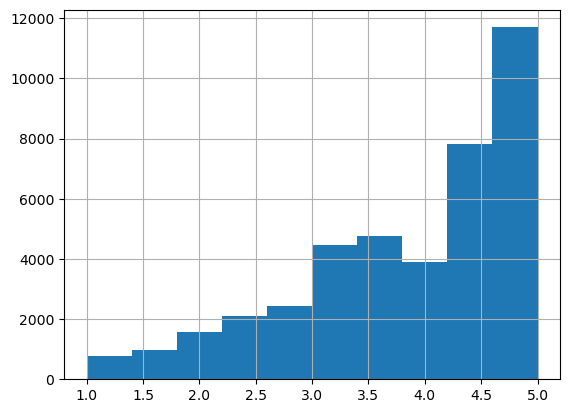

In [382]:
# Data is not normal
df2_full["Average Rating"].hist()

In [383]:
# Extract ratings for each gender
male_ratings = df2_full[df2_full["Male"] == 1]["Average Rating"]
female_ratings = df2_full[df2_full["Female"] == 1]["Average Rating"]
non_binary_ratings = df2_full[df2_full["Non-Binary"] == 1]["Average Rating"]

# Kruskal-Wallis test
stat, p_value = kruskal(male_ratings, female_ratings, non_binary_ratings)
print(f"Kruskal-Wallis Test: Statistic = {stat:.3f}, p-value = {p_value:.3g}")


Kruskal-Wallis Test: Statistic = 227.166, p-value = 4.69e-50


statistically significant results

In [384]:
# Define gender pairs for comparisons
comparisons = [("Male", "Female"), ("Male", "Non-Binary"), ("Female", "Non-Binary")]

# Compute Cliff's Delta for each pair
for g1, g2 in comparisons:
    group1 = df2_full[df2_full["Gender"] == g1]["Average Rating"].tolist()
    group2 = df2_full[df2_full["Gender"] == g2]["Average Rating"].tolist()
    
    delta, _= cliffs_delta(group1, group2)
    
    # Interpretation
    if abs(delta) <= 0.147:
        interpretation = "Small Effect"
    elif 0.147 < abs(delta) <= 0.33:
        interpretation = "Medium Effect"
    else:
        interpretation = "Large Effect"
    
    print(f"Comparison: {g1} vs. {g2}")
    print(f"Cliff's Delta: {delta:.3f}, Interpretation: {interpretation}\n")


Comparison: Male vs. Female
Cliff's Delta: 0.027, Interpretation: Small Effect

Comparison: Male vs. Non-Binary
Cliff's Delta: 0.107, Interpretation: Small Effect

Comparison: Female vs. Non-Binary
Cliff's Delta: 0.077, Interpretation: Small Effect



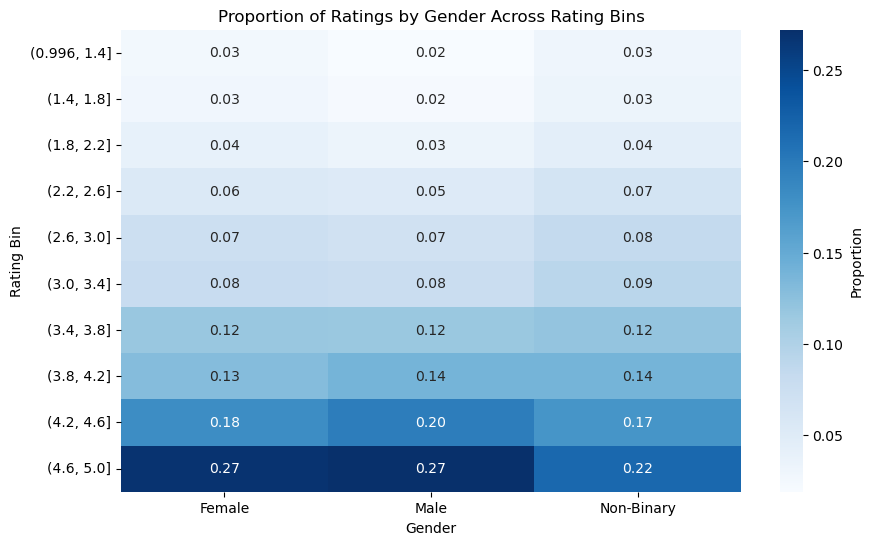

In [385]:
# Create bins for average ratings
df2_full["Rating Bin"] = pd.cut(df2_full["Average Rating"], bins=10)

crosstab = pd.crosstab(df2_full["Rating Bin"], df2_full["Gender"])

# Convert counts to proportions within each gender
proportions = crosstab.div(crosstab.sum(axis=0), axis=1)

df2_full.drop(columns= "Rating Bin", inplace=True)

# Plot the heatmap
plt.figure(figsize=(10, 6))
sns.heatmap(proportions, annot=True, fmt=".2f", cmap="Blues", cbar_kws={"label": "Proportion"})
plt.title("Proportion of Ratings by Gender Across Rating Bins")
plt.xlabel("Gender")
plt.ylabel("Rating Bin")
plt.show()


### Question 2:
Is there a gender difference in the spread (variance/dispersion) of the ratings distribution? Again, it is advisable to consider the statistical significance of any observed gender differences in this spread

In [386]:
# Compute variance and standard deviation for each gender group
for gender in ["Male", "Female", "Non-Binary"]:
    ratings = df2_full[df2_full["Gender"] == gender]["Average Rating"]
    print(f"{gender} - Variance: {ratings.var():.6f}, Std Dev: {ratings.std():.6f}")


Male - Variance: 0.913292, Std Dev: 0.955663
Female - Variance: 1.013723, Std Dev: 1.006838
Non-Binary - Variance: 1.053963, Std Dev: 1.026627


In [387]:
# Group ratings by gender
male_ratings = df2_full[df2_full["Gender"] == "Male"]["Average Rating"]
female_ratings = df2_full[df2_full["Gender"] == "Female"]["Average Rating"]
non_binary_ratings = df2_full[df2_full["Gender"] == "Non-Binary"]["Average Rating"]

# Levene's test for equality of variances
stat, p_value = levene(male_ratings, female_ratings, non_binary_ratings, center="median")
print(f"Levene's Test: Statistic = {stat:.6f}, p-value = {p_value}")


Levene's Test: Statistic = 52.016580, p-value = 2.744311093046388e-23


In [388]:
# Perform pairwise Levene's test
pairs = [("Male", "Female"), ("Male", "Non-Binary"), ("Female", "Non-Binary")]

for g1, g2 in pairs:
    group1 = df2_full[df2_full["Gender"] == g1]["Average Rating"]
    group2 = df2_full[df2_full["Gender"] == g2]["Average Rating"]
    
    stat, p_value = levene(group1, group2, center='median')
    print(f"Levene's Test ({g1} vs. {g2}): Statistic = {stat:.6f}, p-value = {p_value}")


Levene's Test (Male vs. Female): Statistic = 47.063280, p-value = 7.007732817297518e-12
Levene's Test (Male vs. Non-Binary): Statistic = 95.497197, p-value = 1.61609089150612e-22
Levene's Test (Female vs. Non-Binary): Statistic = 11.040396, p-value = 0.0008927712494729011


In [389]:
# Calculate variance for each group
male_variance = male_ratings.var()
female_variance = female_ratings.var()
non_binary_variance = non_binary_ratings.var()

# Pairwise variance ratios
print(f"Variance Ratio (Male vs. Female): {male_variance / female_variance:.3f}")
print(f"Variance Ratio (Male vs. Non-Binary): {male_variance / non_binary_variance:.3f}")
print(f"Variance Ratio (Female vs. Non-Binary): {female_variance / non_binary_variance:.3f}")


Variance Ratio (Male vs. Female): 0.901
Variance Ratio (Male vs. Non-Binary): 0.867
Variance Ratio (Female vs. Non-Binary): 0.962


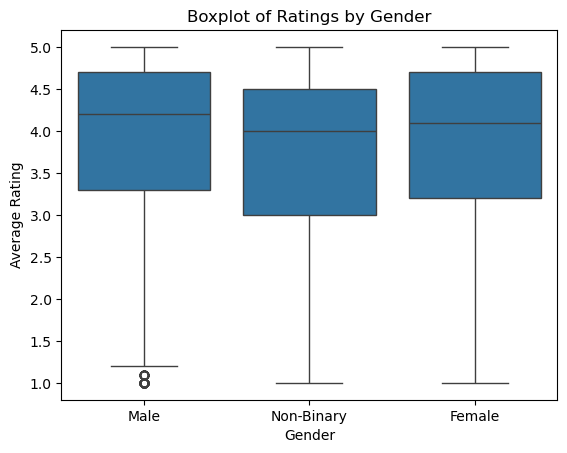

In [390]:
sns.boxplot(x="Gender", y="Average Rating", data=df2_full)
plt.title("Boxplot of Ratings by Gender")
plt.xlabel("Gender")
plt.ylabel("Average Rating")
plt.show()


### Question 3:

What is the likely size of both of these effects (gender bias in average rating, gender bias in spread of average rating), as estimated from this dataset

Bootstrapping cliffs delta efect size scores at 95% confidence intervals for question 1

In [391]:
def bootstrap_cliffs_delta(group1, group2, n_iterations=5000, ci=95, random_seed=random_seed):
    random_seed = random_seed

    bootstrapped_deltas = []
    size1, size2 = len(group1), len(group2)
    
    # actual bootstrapping
    for _ in range(n_iterations):
        sample1 = np.random.choice(group1, size=size1, replace=True)
        sample2 = np.random.choice(group2, size=size2, replace=True)
        delta, _ = cliffs_delta(sample1, sample2)
        bootstrapped_deltas.append(delta)
    
    # calculating confidence intervals
    lower_bound = round(np.percentile(bootstrapped_deltas, (100 - ci) / 2), 6)
    upper_bound = round(np.percentile(bootstrapped_deltas, 100 - (100 - ci) / 2), 6)
    
    return lower_bound, upper_bound

In [392]:
# Define gender pairs for comparisons
gender_pairs = [("Male", "Female"), ("Male", "Non-Binary"), ("Female", "Non-Binary")]

# Store results
bootstrap_results = []

for g1, g2 in gender_pairs:
    group1 = df2_full[df2_full["Gender"] == g1]["Average Rating"].tolist()
    group2 = df2_full[df2_full["Gender"] == g2]["Average Rating"].tolist()
    
    ci_delta = bootstrap_cliffs_delta(group1, group2, n_iterations=1000, ci=95, random_seed=random_seed)
    bootstrap_results.append({"Comparison": f"{g1} vs. {g2}",  "CI": ci_delta})

# Convert results to a DataFrame
results_df = pd.DataFrame(bootstrap_results)
print(results_df)


              Comparison                    CI
0        Male vs. Female   (0.01453, 0.040381)
1    Male vs. Non-Binary  (0.093007, 0.121269)
2  Female vs. Non-Binary  (0.062528, 0.091314)


In [ ]:
# Bootstrap function for variance ratio
def bootstrap_variance_ratio(group1, group2, n_iterations=1000, ci=95, random_seed=random_seed):
    random_seed = np.random.seed(random_seed)
    
    bootstrapped_ratios = []
    size1, size2 = len(group1), len(group2)
    
    for _ in range(n_iterations):
        sample1 = np.random.choice(group1, size=size1, replace=True)
        sample2 = np.random.choice(group2, size=size2, replace=True)
        ratio = np.var(sample1) / np.var(sample2)
        bootstrapped_ratios.append(ratio)
    
    # Confidence interval
    lower_bound = round(np.percentile(bootstrapped_ratios, (100 - ci) / 2), 6)
    upper_bound = round(np.percentile(bootstrapped_ratios, 100 - (100 - ci) / 2), 6)
    return lower_bound, upper_bound

# Example: Male vs. Female
ci_male_female = bootstrap_variance_ratio(male_ratings, female_ratings, n_iterations=1000, ci=95)
ci_male_non_binary = bootstrap_variance_ratio(male_ratings, non_binary_ratings, n_iterations=1000, ci=95)
ci_female_non_binary = bootstrap_variance_ratio(female_ratings, non_binary_ratings, n_iterations=1000, ci=95)

print(f"Variance Ratio CI (Male vs. Female): {ci_male_female}")
print(f"Variance Ratio CI (Male vs. Non-Binary): {ci_male_non_binary}")
print(f"Variance Ratio CI (Female vs. Non-Binary): {ci_female_non_binary}")

Variance Ratio CI (Male vs. Female): (0.87033, 0.931186)
Variance Ratio CI (Male vs. Non-Binary): (0.837156, 0.896976)
Variance Ratio CI (Female vs. Non-Binary): (0.930933, 0.994772)


In [394]:
import numpy as np

# Bootstrap Eta-Squared
def bootstrap_eta_squared(df, groups, column, n_iterations=1000, seed=None):
    eta_squared_values = []
    for _ in range(n_iterations):
        boot_df = df.sample(frac=1, replace=True)
        total_variance = np.var(boot_df[column], ddof=1) * len(boot_df[column].dropna())
        group_variances = [
            np.var(boot_df[boot_df[groups] == g][column].dropna(), ddof=1) * len(boot_df[boot_df[groups] == g][column].dropna())
            for g in boot_df[groups].unique()
        ]
        between_variance = sum(group_variances)
        eta_squared_values.append(between_variance / total_variance)
    lower = np.percentile(eta_squared_values, 2.5)
    upper = np.percentile(eta_squared_values, 97.5)
    return np.mean(eta_squared_values), (lower, upper)

# Example usage
eta_squared, eta_ci = bootstrap_eta_squared(df2_full, "Gender", "Average Rating", n_iterations=1000, seed=random_seed)
print(f"Bootstrapped Eta-Squared: {eta_squared:.3f}")
print(f"95% CI for Eta-Squared: {eta_ci}")


Bootstrapped Eta-Squared: 0.994
95% CI for Eta-Squared: (0.9927582441642873, 0.9957379277500215)


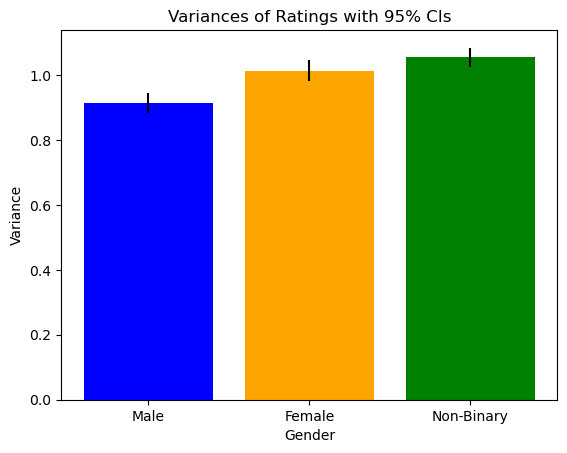

In [ ]:
# Plot Variances with CIs
groups = ["Male", "Female", "Non-Binary"]
variances = [male_variance, female_variance, non_binary_variance]
variance_cis = [
    (ci_male_female[0], ci_male_female[1]),
    (ci_female_non_binary[0], ci_female_non_binary[1]),
    (ci_male_non_binary[0], ci_male_non_binary[1])
]

plt.bar(groups, variances, color=["blue", "orange", "green"], yerr=[(ci[1]-ci[0])/2 for ci in variance_cis])
plt.title("Variances of Ratings with 95% CIs")
plt.ylabel("Variance")
plt.xlabel("Gender")
plt.show()


### Question 4:

Is there a gender difference in the tags awarded by students? Make sure to teach each of the 20 tags for a potential gender difference and report which of them exhibit a statistically significant different. Comment on the 3 most gendered (lowest p-value) and least gendered (highest p-value) tags.

In [396]:
threshold = 3

merged_df = merging_df[merging_df["Number of ratings"] >= threshold]

In [397]:
merged_df

,Tough Grader,Good Feedback,Respected,Lots to read,Participation matters,Don't skip class or you won't pass,Lots of homework,Inspirational,Pop quizzes,Accessible,...,Group projects,Lecture heavy,Average Rating,Average Difficulty,Number of ratings,Received a 'pepper'?,Proportion of students who said they would take the class again,Number of ratings from online classes,Male,Female
2,2,1,2,1,0,4,2,0,0,0,...,0,0,3.2,3.0,4.0,0.0,NaN,0.0,1,0
3,6,3,0,0,2,4,2,1,0,0,...,1,0,3.6,3.5,10.0,1.0,NaN,0.0,0,0
5,8,13,1,3,2,3,2,1,0,3,...,1,3,3.5,3.3,22.0,0.0,56.0,7.0,1,0
8,1,1,0,0,0,0,0,0,0,1,...,0,1,2.6,4.5,4.0,1.0,NaN,0.0,0,0
18,0,2,0,0,1,0,0,0,1,0,...,0,0,4.2,1.7,3.0,1.0,NaN,0.0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
89876,0,0,1,0,0,0,0,0,2,0,...,1,0,2.8,2.8,4.0,0.0,NaN,0.0,0,0
89877,3,0,1,0,0,1,6,1,1,3,...,0,1,3.6,3.4,10.0,0.0,50.0,1.0,1,0
89885,2,0,0,3,0,1,0,1,0,0,...,0,0,3.9,3.8,4.0,1.0,NaN,0.0,0,1
89890,0,3,1,1,2,1,0,0,0,1,...,0,0,5.0,1.7,6.0,1.0,100.0,2.0,1,0


In [398]:
# Reclassify gender including non-binary as both (1,1) or (0,0)
merged_df["Non-Binary"] = merged_df.apply(
    lambda row: 1 if (row["Male"] == 1 and row["Female"] == 1) or (row["Male"] == 0 and row["Female"] == 0) else
                (0 if row["Male"] == 1 else 0), axis=1
)

C:\Users\Nancy Lonoff\AppData\Local\Temp\ipykernel_55044\3257320985.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  merged_df["Non-Binary"] = merged_df.apply(


In [399]:
# data to normalize
tags = [
    "Tough Grader", "Good Feedback", "Respected", "Lots to read", 
    "Participation matters", "Don't skip class or you won't pass", "Lots of homework", 
    "Inspirational", "Pop quizzes", "Accessible", "So many papers", 
    "Clear grading", "Hilarious", "Test heavy", "Graded by a few things", 
    "Amazing lectures", "Caring", "Extra credit", "Group projects", "Lecture heavy"
]

In [400]:
# Calculate the scaling factor as the average number of ratings
scaling_factor = merged_df["Number of ratings"].mean()

# Scale each tag by dividing its count by the professor's total number of ratings,
# then multiplying by the scaling factor
for tag in tags:
    merged_df[f"{tag}_scaled"] = (merged_df[tag] / merged_df["Number of ratings"]) * scaling_factor

# Example: Check scaled values for a sample tag
print(merged_df[[tag, f"{tag}_scaled", "Number of ratings"]].head())


    Lecture heavy  Lecture heavy_scaled  Number of ratings
2               0              0.000000                4.0
3               0              0.000000               10.0
5               3              1.126941               22.0
8               1              2.066059                4.0
18              0              0.000000                3.0


C:\Users\Nancy Lonoff\AppData\Local\Temp\ipykernel_55044\677837372.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  merged_df[f"{tag}_scaled"] = (merged_df[tag] / merged_df["Number of ratings"]) * scaling_factor
C:\Users\Nancy Lonoff\AppData\Local\Temp\ipykernel_55044\677837372.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  merged_df[f"{tag}_scaled"] = (merged_df[tag] / merged_df["Number of ratings"]) * scaling_factor
C:\Users\Nancy Lonoff\AppData\Local\Temp\ipykernel_55044\677837372.py:7: SettingWi

In [401]:
# Create contingency tables based on scaled values
contingency_tables_scaled = {}

for tag in tags:
    table = pd.DataFrame({
        "Yes": [
            merged_df[(merged_df["Male"] == 1) & (merged_df[f"{tag}_scaled"] > 0)][f"{tag}_scaled"].sum(),
            merged_df[(merged_df["Female"] == 1) & (merged_df[f"{tag}_scaled"] > 0)][f"{tag}_scaled"].sum(),
            merged_df[(merged_df["Non-Binary"] == 1) & (merged_df[f"{tag}_scaled"] > 0)][f"{tag}_scaled"].sum()
        ],
        "No": [
            merged_df[(merged_df["Male"] == 1) & (merged_df[f"{tag}_scaled"] == 0)].shape[0],
            merged_df[(merged_df["Female"] == 1) & (merged_df[f"{tag}_scaled"] == 0)].shape[0],
            merged_df[(merged_df["Non-Binary"] == 1) & (merged_df[f"{tag}_scaled"] == 0)].shape[0]
        ]
    }, index=["Male", "Female", "Non-Binary"])
    contingency_tables_scaled[tag] = table

    # Display the normalized contingency table
    print(f"Contingency Table for {tag}:")
    print(table)
    print("-" * 50)


Contingency Table for Tough Grader:
                     Yes    No
Male        24648.127823  8492
Female      23967.073285  7378
Non-Binary  17347.112684  4923
--------------------------------------------------
Contingency Table for Good Feedback:
                     Yes    No
Male        33838.796966  5524
Female      34170.643798  4324
Non-Binary  19286.753178  3844
--------------------------------------------------
Contingency Table for Respected:
                     Yes    No
Male        24549.888434  7243
Female      18617.299580  7321
Non-Binary  13549.225179  5073
--------------------------------------------------
Contingency Table for Lots to read:
                     Yes    No
Male        19666.376229  9484
Female      18740.649189  8098
Non-Binary  11496.558669  6124
--------------------------------------------------
Contingency Table for Participation matters:
                     Yes    No
Male        22403.106114  7882
Female      23174.272297  6175
Non-Binary  14812.81

In [402]:
# Initialize a list to store tags with low expected counts
low_expected_tags = []

# Iterate over each tag in your tags list
for tag, table in contingency_tables_scaled.items():
    # Perform the Chi-Square test on the contingency table
    chi2, p_value, _, expected = chi2_contingency(table)
    
    # Check if any expected counts are below 5
    if (expected < 5).any():
        low_expected_tags.append(tag)

# Output results
if low_expected_tags:
    print("Tags with low expected counts:", low_expected_tags)
else:
    print("All tags meet the expected count assumption.")


All tags meet the expected count assumption.


In [403]:
# Perform Chi-Square tests on normalized data
normalized_results = []

for tag, table in contingency_tables_scaled.items():
    chi2, p_value, _, expected = chi2_contingency(table)
    n = table.values.sum()  
    k = min(table.shape) 
    cramers_v = np.sqrt(chi2 / (n * (k - 1))) 
    
    # Store results
    normalized_results.append({
        "Tag": tag,
        "Chi-Square": chi2,
        "p-value": p_value,
        "Cramér's V": cramers_v
    })

# Convert to DataFrame
results_df = pd.DataFrame(normalized_results)

# Sort by p-value
results_df = results_df.sort_values(by="p-value")


results_df

,Tag,Chi-Square,p-value,Cramér's V
12,Hilarious,2298.566676,0.000000e+00,0.186414
15,Amazing lectures,427.911585,1.202763e-93,0.082780
1,Good Feedback,370.061318,4.387385e-81,0.060534
19,Lecture heavy,365.334854,4.661700e-80,0.077304
6,Lots of homework,299.532221,9.065767e-66,0.063273
10,So many papers,260.630109,2.540335e-57,0.073993
2,Respected,251.413127,2.548784e-55,0.057383
18,Group projects,244.580655,7.762213e-54,0.068110
4,Participation matters,214.468308,2.684099e-47,0.052003
14,Graded by a few things,190.646074,3.996971e-42,0.064284


C:\Users\Nancy Lonoff\AppData\Local\Temp\ipykernel_55044\4016613932.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=results_df, y="Tag", x="Cramér's V", palette="viridis")


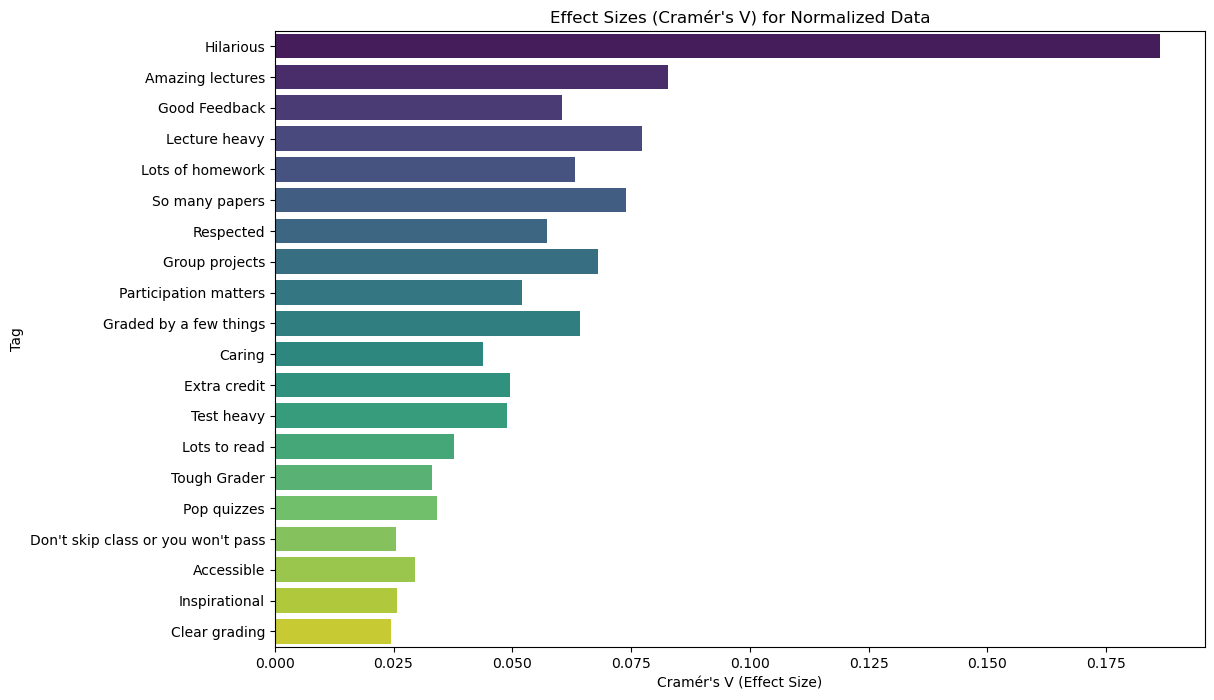

In [404]:
# Visualize effect sizes for normalized data
plt.figure(figsize=(12, 8))
sns.barplot(data=results_df, y="Tag", x="Cramér's V", palette="viridis")
plt.title("Effect Sizes (Cramér's V) for Normalized Data")
plt.xlabel("Cramér's V (Effect Size)")
plt.ylabel("Tag")
plt.show()

Heat Map to show proportions of each contigency table

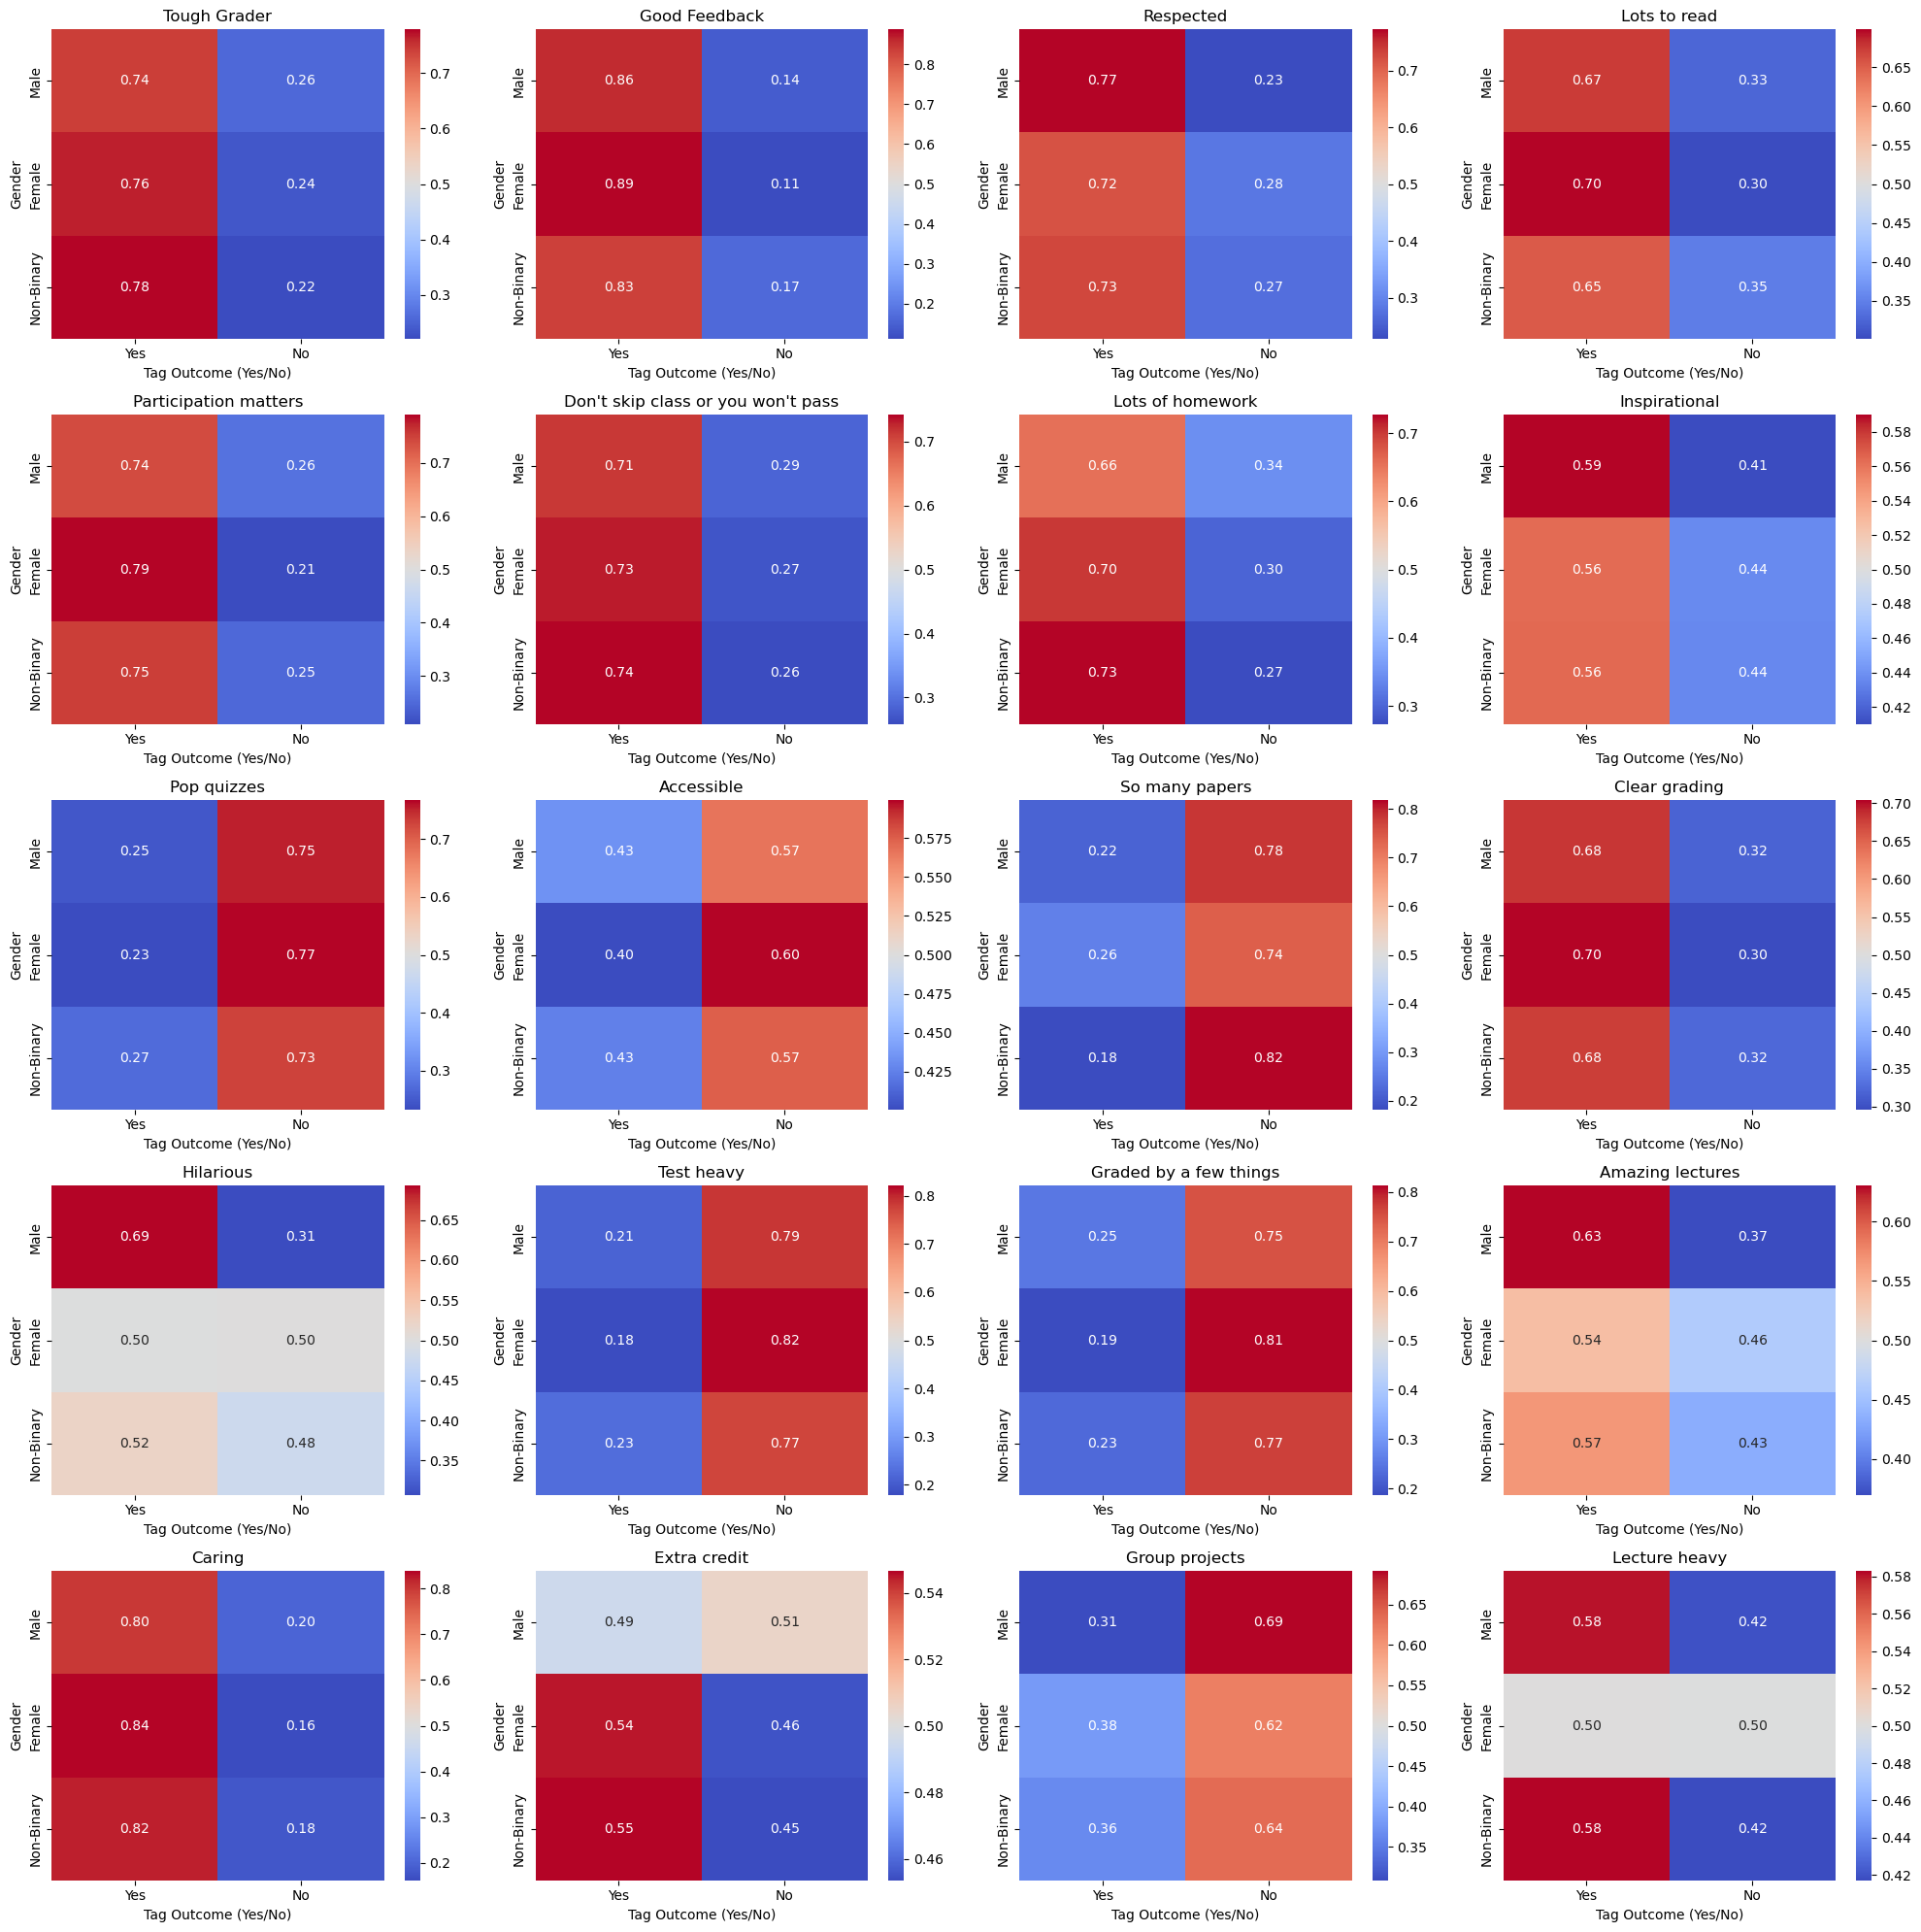

In [405]:
# Calculate proportions for each contingency table
proportion_tables = {}
for tag, table in contingency_tables_scaled.items():
    proportion_table = table.div(table.sum(axis=1), axis=0)
    proportion_tables[tag] = proportion_table


fig, axes = plt.subplots(5, 4, figsize=(20, 20))
axes = axes.flatten()

# Plot each heatmap
for i, (tag, table) in enumerate(proportion_tables.items()):
    sns.heatmap(
        table,
        annot=True,
        fmt=".2f",
        cmap="coolwarm",
        cbar=True,
        ax=axes[i]
    )
    axes[i].set_title(tag)
    axes[i].set_xlabel("Tag Outcome (Yes/No)")
    axes[i].set_ylabel("Gender")

plt.tight_layout()
plt.show()


### Question 5:

Is there a gender difference in terms of average difficulty? Again, a significance test is indicated

In [406]:
df2_full

,Average Rating,Average Difficulty,Number of ratings,Received a 'pepper'?,Proportion of students who said they would take the class again,Number of ratings from online classes,Male,Female,Non-Binary,Gender
2,3.2,3.0,4.0,0.0,NaN,0.0,1,0,0,Male
3,3.6,3.5,10.0,1.0,NaN,0.0,0,0,1,Non-Binary
5,3.5,3.3,22.0,0.0,56.0,7.0,1,0,0,Male
8,2.6,4.5,4.0,1.0,NaN,0.0,0,0,1,Non-Binary
18,4.2,1.7,3.0,1.0,NaN,0.0,0,1,0,Female
...,...,...,...,...,...,...,...,...,...,...
89876,2.8,2.8,4.0,0.0,NaN,0.0,0,0,1,Non-Binary
89877,3.6,3.4,10.0,0.0,50.0,1.0,1,0,0,Male
89885,3.9,3.8,4.0,1.0,NaN,0.0,0,1,0,Female
89890,5.0,1.7,6.0,1.0,100.0,2.0,1,0,0,Male


In [407]:
male_difficulty = df2_full[df2_full["Male"] == 1]["Average Difficulty"]
female_difficulty = df2_full[df2_full["Female"] == 1]["Average Difficulty"]
nonbinary_difficulty = df2_full[df2_full["Non-Binary"] == 1]["Average Difficulty"]


In [408]:
print("Male Normality Test:", shapiro(male_difficulty))
print("Female Normality Test:", shapiro(female_difficulty))
print("Non-Binary Normality Test:", shapiro(nonbinary_difficulty))


Male Normality Test: ShapiroResult(statistic=0.991498940969337, pvalue=2.3829563198748353e-30)
Female Normality Test: ShapiroResult(statistic=0.9914811901834246, pvalue=6.439604073009915e-29)
Non-Binary Normality Test: ShapiroResult(statistic=0.9928469063838541, pvalue=8.15459229001319e-23)


c:\Users\Public\anaconda3\Lib\site-packages\scipy\stats\_axis_nan_policy.py:531: UserWarning: scipy.stats.shapiro: For N > 5000, computed p-value may not be accurate. Current N is 17024.
  res = hypotest_fun_out(*samples, **kwds)
c:\Users\Public\anaconda3\Lib\site-packages\scipy\stats\_axis_nan_policy.py:531: UserWarning: scipy.stats.shapiro: For N > 5000, computed p-value may not be accurate. Current N is 15148.
  res = hypotest_fun_out(*samples, **kwds)
c:\Users\Public\anaconda3\Lib\site-packages\scipy\stats\_axis_nan_policy.py:531: UserWarning: scipy.stats.shapiro: For N > 5000, computed p-value may not be accurate. Current N is 10802.
  res = hypotest_fun_out(*samples, **kwds)


In [409]:
kruskal_test = kruskal(male_difficulty, female_difficulty, nonbinary_difficulty)
print(f"Kruskal-Wallis Test: Statistic={kruskal_test.statistic}, p-value={kruskal_test.pvalue}")

Kruskal-Wallis Test: Statistic=86.40317360645942, p-value=1.7289771029285476e-19


In [410]:
pairs = [("Male", "Female"), ("Male", "Non-Binary"), ("Female", "Non-Binary")]
for g1, g2 in pairs:
    group1 = df2_full[df2_full[g1] == 1]["Average Difficulty"]
    group2 = df2_full[df2_full[g2] == 1]["Average Difficulty"]
    stat, p_value = mannwhitneyu(group1, group2, alternative='two-sided')
    print(f"{g1} vs {g2} - Mann-Whitney U Test: U-statistic={stat}, p-value={p_value}")


Male vs Female - Mann-Whitney U Test: U-statistic=129240565.5, p-value=0.7172880177020512
Male vs Non-Binary - Mann-Whitney U Test: U-statistic=86578539.0, p-value=1.9030826104922442e-16
Female vs Non-Binary - Mann-Whitney U Test: U-statistic=76830568.0, p-value=5.0250511688371685e-17


C:\Users\Nancy Lonoff\AppData\Local\Temp\ipykernel_55044\818332095.py:14: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=difficulty_df, x="Gender", y="Average Difficulty", palette="muted")


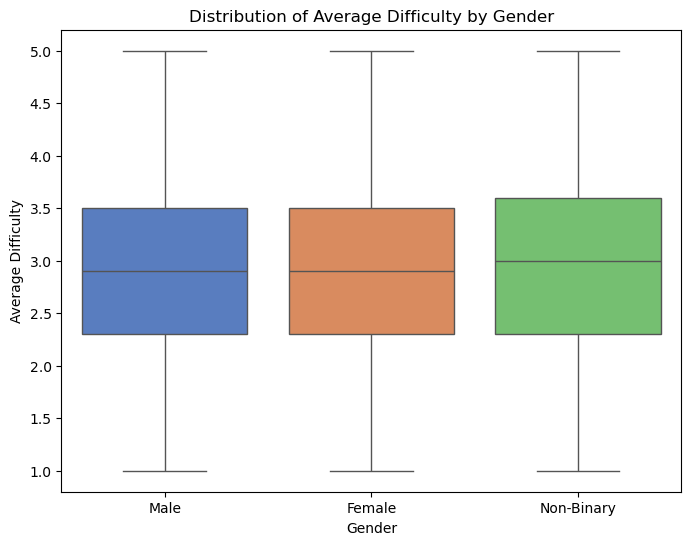

In [411]:
import seaborn as sns
import matplotlib.pyplot as plt

# Create a new DataFrame with gender and difficulty
difficulty_df = pd.DataFrame({
    "Gender": (["Male"] * len(male_difficulty) +
               ["Female"] * len(female_difficulty) +
               ["Non-Binary"] * len(nonbinary_difficulty)),
    "Average Difficulty": pd.concat([male_difficulty, female_difficulty, nonbinary_difficulty])
})

# Plot boxplot
plt.figure(figsize=(8, 6))
sns.boxplot(data=difficulty_df, x="Gender", y="Average Difficulty", palette="muted")
plt.title("Distribution of Average Difficulty by Gender")
plt.xlabel("Gender")
plt.ylabel("Average Difficulty")
plt.show()


C:\Users\Nancy Lonoff\AppData\Local\Temp\ipykernel_55044\1398656349.py:3: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(male_difficulty, label="Male", shade=True)
C:\Users\Nancy Lonoff\AppData\Local\Temp\ipykernel_55044\1398656349.py:4: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(female_difficulty, label="Female", shade=True)
C:\Users\Nancy Lonoff\AppData\Local\Temp\ipykernel_55044\1398656349.py:5: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(nonbinary_difficulty, label="Non-Binary", shade=True)


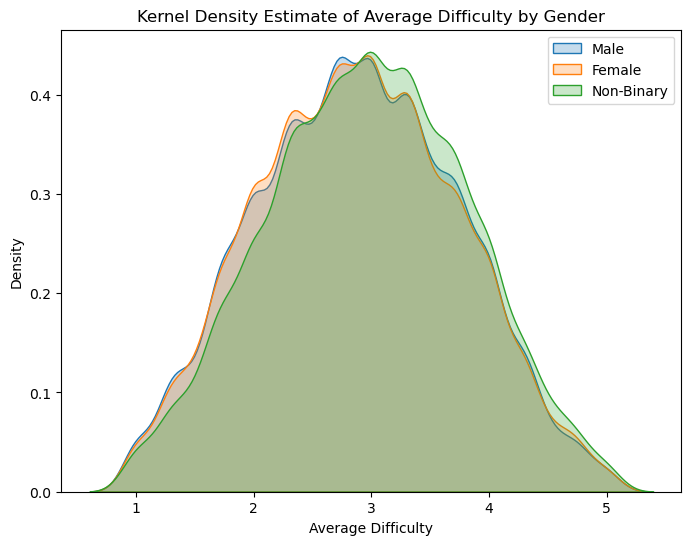

In [412]:
# Plot KDE plot
plt.figure(figsize=(8, 6))
sns.kdeplot(male_difficulty, label="Male", shade=True)
sns.kdeplot(female_difficulty, label="Female", shade=True)
sns.kdeplot(nonbinary_difficulty, label="Non-Binary", shade=True)
plt.title("Kernel Density Estimate of Average Difficulty by Gender")
plt.xlabel("Average Difficulty")
plt.ylabel("Density")
plt.legend()
plt.show()


### Question 6:

Please quantify the likely size of this effect at 95% confidence

In [413]:
# Calculate epsilon squared (effect size)
n_total = len(male_difficulty) + len(female_difficulty) + len(nonbinary_difficulty)
k_groups = 3 
epsilon_squared = (stat - k_groups + 1) / (n_total - k_groups)
print(f"Epsilon Squared (Effect Size) = {epsilon_squared:.4f}")


Epsilon Squared (Effect Size) = 1787.9632


In [414]:
def bootstrap_epsilon_squared(data_groups, n_bootstrap=1000, alpha=0.05, random_seed=random_seed):
    np.random.seed(random_seed)
    boot_epsilon = []
    n_total = sum(len(group) for group in data_groups)
    k_groups = len(data_groups)

    for _ in range(n_bootstrap):
        boot_groups = [np.random.choice(group, size=len(group), replace=True) for group in data_groups]
        stat, _ = kruskal(*boot_groups)
        epsilon = (stat - k_groups + 1) / (n_total - k_groups)
        boot_epsilon.append(epsilon)

    lower_bound = np.percentile(boot_epsilon, alpha / 2 * 100)
    upper_bound = np.percentile(boot_epsilon, (1 - alpha / 2) * 100)
    return np.mean(boot_epsilon), (lower_bound, upper_bound)

# Bootstrapped epsilon squared
data_groups = [male_difficulty.values, female_difficulty.values, nonbinary_difficulty.values]
mean_epsilon, (ci_lower, ci_upper) = bootstrap_epsilon_squared(data_groups)
print(f"Epsilon Squared (Bootstrapped): Mean = {mean_epsilon:.4f}, 95% CI = ({ci_lower:.4f}, {ci_upper:.4f})")


Epsilon Squared (Bootstrapped): Mean = 0.0020, 95% CI = (0.0012, 0.0029)


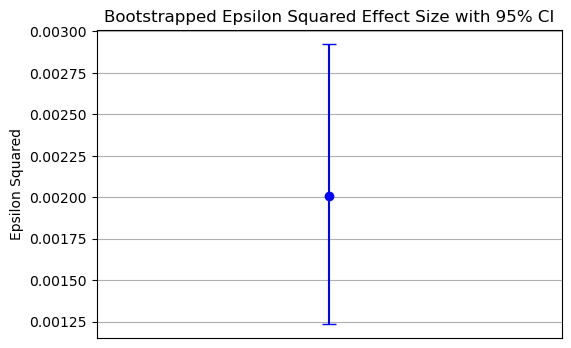

In [415]:
# Plot the bootstrapped epsilon squared
plt.figure(figsize=(6, 4))
plt.errorbar(0, mean_epsilon, yerr=[[mean_epsilon - ci_lower], [ci_upper - mean_epsilon]], fmt='o', capsize=5, color='blue')
plt.title("Bootstrapped Epsilon Squared Effect Size with 95% CI")
plt.ylabel("Epsilon Squared")
plt.xticks([], [])
plt.grid()
plt.show()


In [416]:
def bootstrap_cliffs_delta(group1, group2, n_bootstrap=1000, alpha=0.05, random_seed=random_seed):

    np.random.seed(random_seed)
    bootstrapped_deltas = []
    # combined = np.concatenate([group1, group2])

    for _ in range(n_bootstrap):
        resampled_group1 = np.random.choice(group1, size=len(group1), replace=True)
        resampled_group2 = np.random.choice(group2, size=len(group2), replace=True)
        delta, _ = cliffs_delta(resampled_group1, resampled_group2)
        bootstrapped_deltas.append(delta)
    
    lower_bound = round(np.percentile(bootstrapped_deltas, alpha / 2 * 100), 5)
    upper_bound = round(np.percentile(bootstrapped_deltas, (1 - alpha / 2) * 100), 5)
    return np.mean(bootstrapped_deltas), (lower_bound, upper_bound)


In [417]:
# List of gender pairs
pairs = [("Male", "Female"), ("Male", "Non-Binary"), ("Female", "Non-Binary")]

# Store results
cliffs_delta_results = []

for g1, g2 in pairs:
    group1 = df2_full[df2_full[g1] == 1]["Average Difficulty"].tolist()
    group2 = df2_full[df2_full[g2] == 1]["Average Difficulty"].tolist()
    
    # Bootstrapped Cliff's Delta
    mean_delta, (ci_lower, ci_upper) = bootstrap_cliffs_delta(group1, group2)
    
    # Store results
    cliffs_delta_results.append({
        "Comparison": f"{g1} vs {g2}",
        "Mean Cliff's Delta": mean_delta,
        "95% CI": (ci_lower, ci_upper)
    })

# Convert results to DataFrame
import pandas as pd
cliffs_delta_df = pd.DataFrame(cliffs_delta_results)

cliffs_delta_df

,Comparison,Mean Cliff's Delta,95% CI
0,Male vs Female,0.001903,"(-0.00983, 0.01405)"
1,Male vs Non-Binary,-0.058670,"(-0.0725, -0.04464)"
2,Female vs Non-Binary,-0.060891,"(-0.07491, -0.04771)"


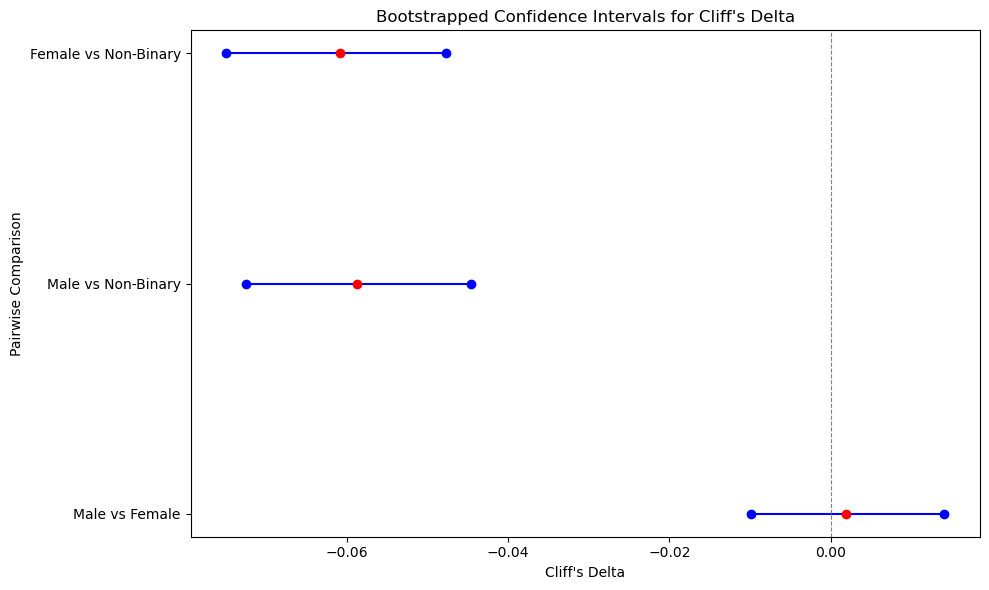

In [ ]:
# Extract values for visualization
comparisons = cliffs_delta_df["Comparison"]
mean_deltas = cliffs_delta_df["Mean Cliff's Delta"]
ci_lower = cliffs_delta_df["95% CI"].apply(lambda x: x[0])
ci_upper = cliffs_delta_df["95% CI"].apply(lambda x: x[1])

# Plot
plt.figure(figsize=(10, 6))
for i, (mean, lower, upper) in enumerate(zip(mean_deltas, ci_lower, ci_upper)):
    plt.plot([lower, upper], [i, i], "o-", color="blue")
    plt.scatter(mean, i, color="red", zorder=3)

plt.yticks(range(len(comparisons)), comparisons)
plt.axvline(0, color='gray', linestyle='--', linewidth=0.8)
plt.title("Bootstrapped Confidence Intervals for Cliff's Delta")
plt.xlabel("Cliff's Delta")
plt.ylabel("Pairwise Comparison")
plt.tight_layout()
plt.show()


### Question 7

 Build a regression model predicting average rating from all numerical predictors (the ones in the rmpCapstoneNum.csv) file. Make sure to include the R2and RMSE of this model. Which of these factors is most strongly predictive of average rating? Hint: Make sure to address collinearity concern

In [419]:
df_ml = df2_full.drop(columns="Gender")

df_ml

,Average Rating,Average Difficulty,Number of ratings,Received a 'pepper'?,Proportion of students who said they would take the class again,Number of ratings from online classes,Male,Female,Non-Binary
2,3.2,3.0,4.0,0.0,NaN,0.0,1,0,0
3,3.6,3.5,10.0,1.0,NaN,0.0,0,0,1
5,3.5,3.3,22.0,0.0,56.0,7.0,1,0,0
8,2.6,4.5,4.0,1.0,NaN,0.0,0,0,1
18,4.2,1.7,3.0,1.0,NaN,0.0,0,1,0
...,...,...,...,...,...,...,...,...,...
89876,2.8,2.8,4.0,0.0,NaN,0.0,0,0,1
89877,3.6,3.4,10.0,0.0,50.0,1.0,1,0,0
89885,3.9,3.8,4.0,1.0,NaN,0.0,0,1,0
89890,5.0,1.7,6.0,1.0,100.0,2.0,1,0,0


In [420]:
df_ml.isnull().sum()

Average Rating                                                         0
Average Difficulty                                                     0
Number of ratings                                                      0
Received a 'pepper'?                                                   0
Proportion of students who said they would take the class again    28368
Number of ratings from online classes                                  0
Male                                                                   0
Female                                                                 0
Non-Binary                                                             0
dtype: int64

"Proportion of students who said they would take the class again" is highly correlated with the target variable

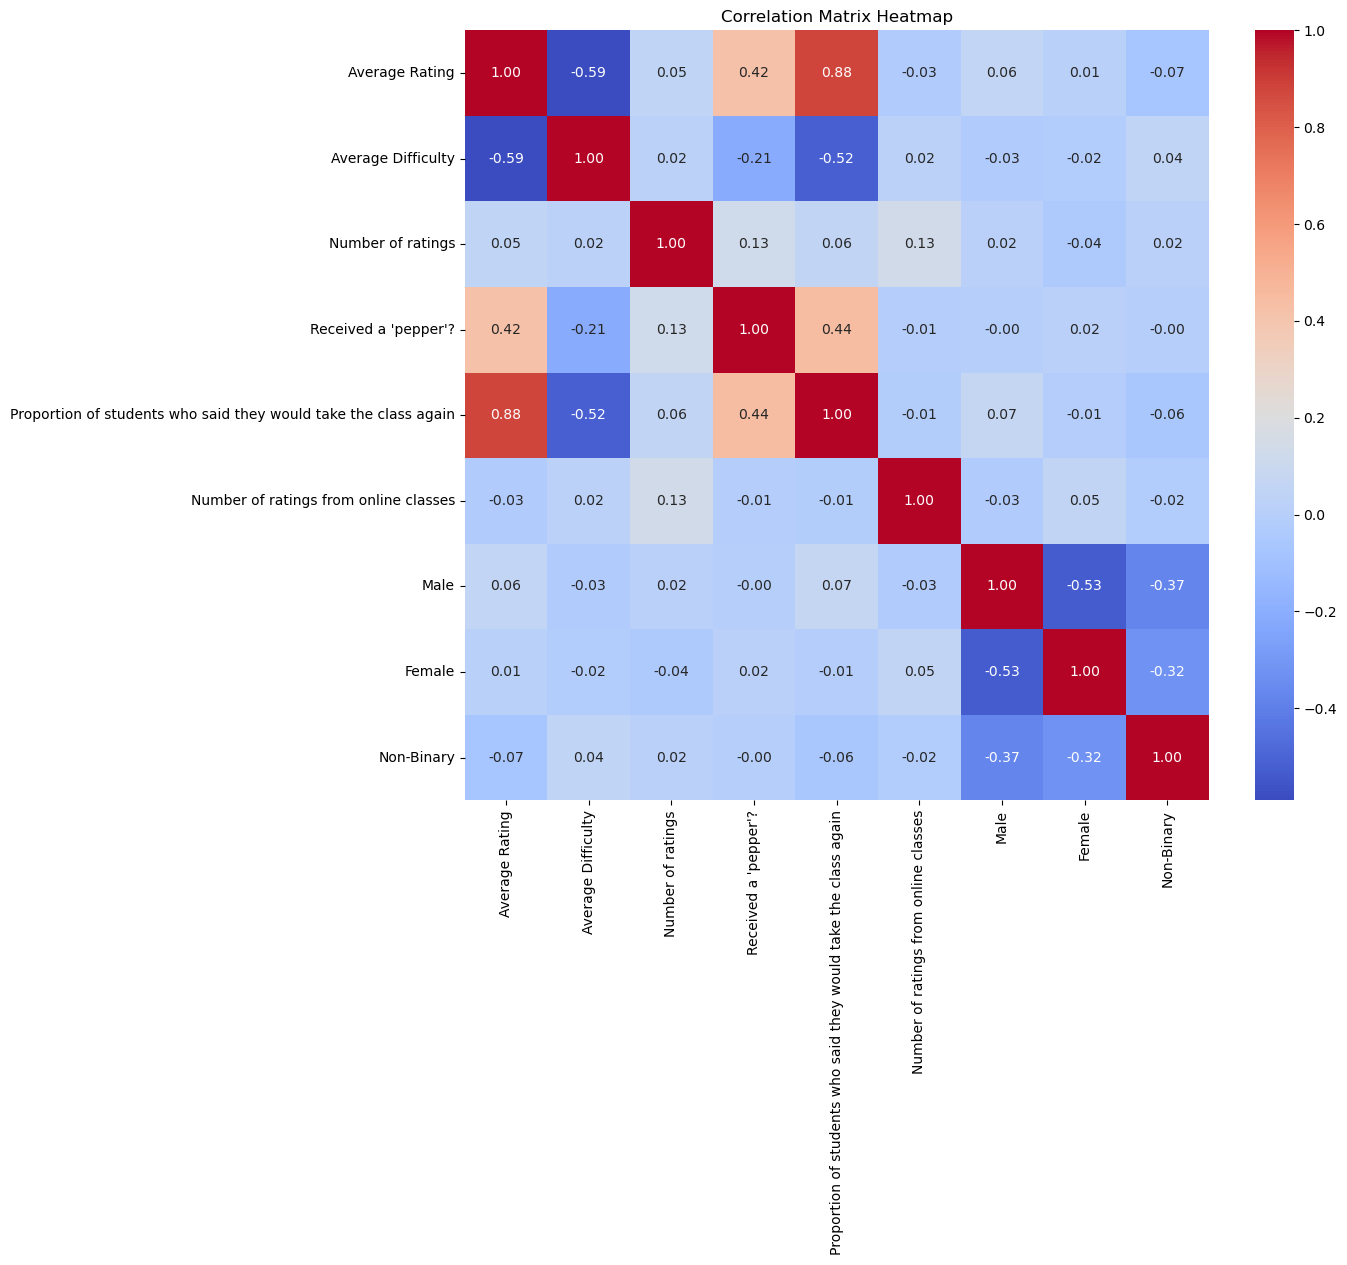

In [421]:
correlation_matrix = df_ml.corr()

# Plot the heatmap
plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap="coolwarm", cbar=True)
plt.title("Correlation Matrix Heatmap")
plt.show()

In [422]:
# Separate data with and without nulls
train_data = df_ml[df_ml["Proportion of students who said they would take the class again"].notnull()]
test_data = df_ml[df_ml["Proportion of students who said they would take the class again"].isnull()]

# Define predictors and target for imputation model
X_train = train_data.drop(columns=["Proportion of students who said they would take the class again", "Average Rating"])
y_train = train_data["Proportion of students who said they would take the class again"]

X_test = test_data.drop(columns=["Proportion of students who said they would take the class again", "Average Rating"])

# Train a Random Forest Regressor
rf_imputer = RandomForestRegressor(random_state=random_seed)
rf_imputer.fit(X_train, y_train)

# Predict missing values
test_data["Proportion of students who said they would take the class again"] = rf_imputer.predict(X_test)

# Combine data
imputed_df = pd.concat([train_data, test_data])


C:\Users\Nancy Lonoff\AppData\Local\Temp\ipykernel_55044\3971905792.py:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test_data["Proportion of students who said they would take the class again"] = rf_imputer.predict(X_test)


In [423]:
imputed_df

,Average Rating,Average Difficulty,Number of ratings,Received a 'pepper'?,Proportion of students who said they would take the class again,Number of ratings from online classes,Male,Female,Non-Binary
5,3.5,3.3,22.0,0.0,56.000000,7.0,1,0,0
25,4.3,3.3,16.0,1.0,83.000000,0.0,0,1,0
40,1.8,3.8,15.0,0.0,22.000000,1.0,0,1,0
42,4.1,3.3,21.0,0.0,67.000000,0.0,0,1,0
46,4.2,1.8,26.0,1.0,57.000000,8.0,1,0,0
...,...,...,...,...,...,...,...,...,...
89870,5.0,3.6,5.0,1.0,81.142556,0.0,1,1,1
89873,4.4,1.2,5.0,0.0,83.940000,0.0,0,0,1
89876,2.8,2.8,4.0,0.0,80.171905,0.0,0,0,1
89885,3.9,3.8,4.0,1.0,73.232190,0.0,0,1,0


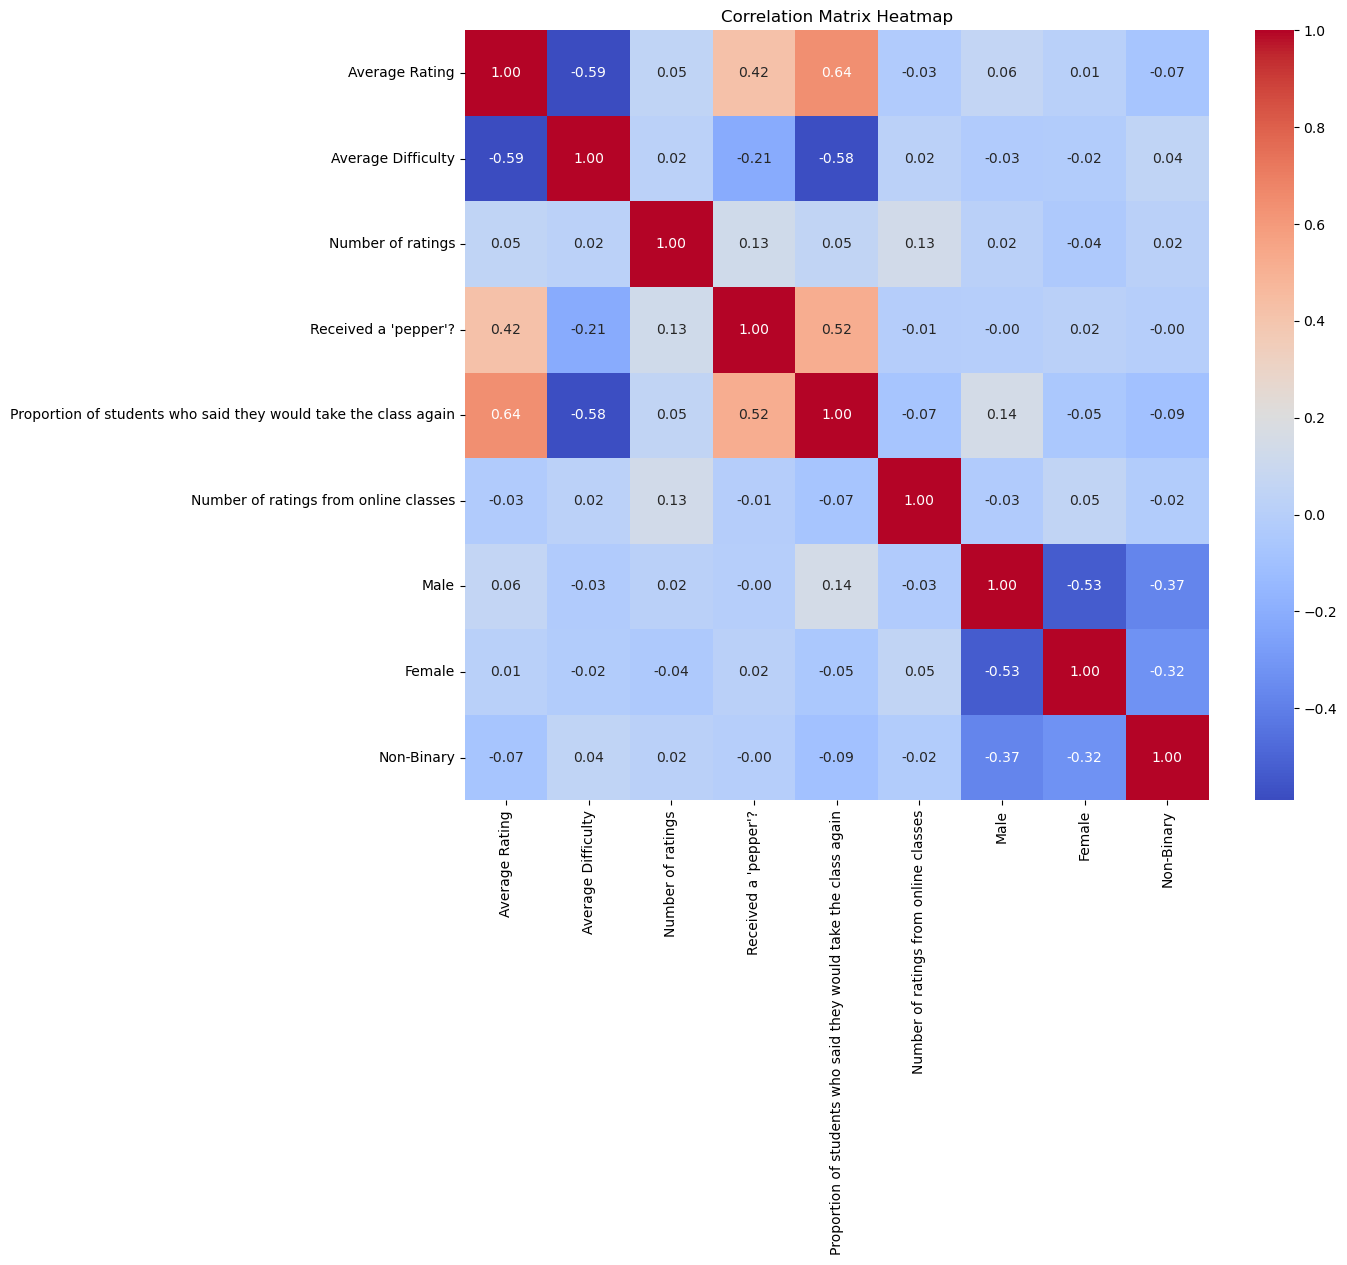

In [424]:
# Compute the correlation matrix
correlation_matrix = imputed_df.corr()

# Plot the heatmap
plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap="coolwarm", cbar=True)
plt.title("Correlation Matrix Heatmap")
plt.show()

In [425]:
X = imputed_df.drop(columns=['Average Rating']) 
y = imputed_df['Average Rating'] 

# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=random_seed)


# Scale the training data
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train) 
X_test_scaled = scaler.transform(X_test)       

# Create a linear regression model
model = LinearRegression()

# Fit the model on the scaled training data
model.fit(X_train_scaled, y_train)

# Make predictions on the scaled test set
y_pred = model.predict(X_test_scaled)

# Evaluate the model's performance
rmse = root_mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("Coefficients: ", model.coef_)
print("Root Mean Squared Error: ", rmse)
print("R-squared: ", r2)



Coefficients:  [-0.35013528  0.01656237  0.14857332  0.35364698 -0.00303872 -0.00372797
  0.01212567 -0.01746764]
Root Mean Squared Error:  0.7026061704651124
R-squared:  0.5042693169966113


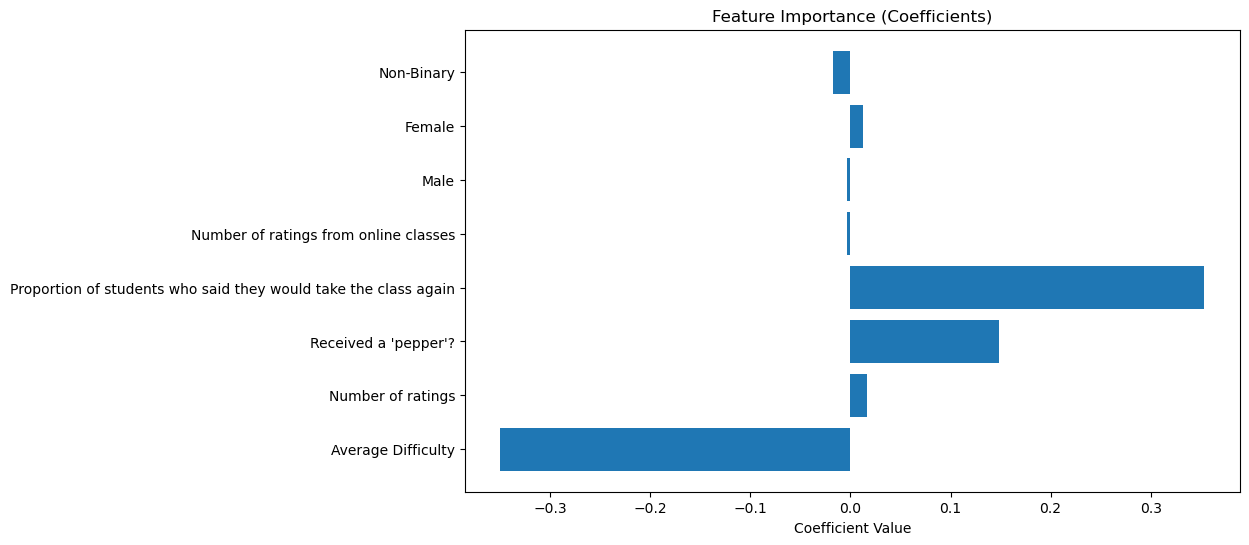

In [426]:
# Get the feature coefficients
coef = model.coef_
features = X.columns

# Plot the coefficients
plt.figure(figsize=(10, 6))
plt.barh(features, coef)
plt.title("Feature Importance (Coefficients)")
plt.xlabel("Coefficient Value")
plt.show()


### Question 8:

Build a regression model predicting average ratings from all tags (the ones in the rmpCapstoneTags.csv) file. Make sure to include the R2and RMSE of this model. Which of these tags is most strongly predictive of average rating? Hint: Make sure to address collinearity concerns. Also comment on how this model compares to the previous on

In [427]:
merged_df

,Tough Grader,Good Feedback,Respected,Lots to read,Participation matters,Don't skip class or you won't pass,Lots of homework,Inspirational,Pop quizzes,Accessible,...,So many papers_scaled,Clear grading_scaled,Hilarious_scaled,Test heavy_scaled,Graded by a few things_scaled,Amazing lectures_scaled,Caring_scaled,Extra credit_scaled,Group projects_scaled,Lecture heavy_scaled
2,2,1,2,1,0,4,2,0,0,0,...,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.0,0.000000,0.000000
3,6,3,0,0,2,4,2,1,0,0,...,0.000000,1.652847,0.826424,0.000000,0.0,0.000000,0.000000,0.0,0.826424,0.000000
5,8,13,1,3,2,3,2,1,0,3,...,0.000000,2.629530,1.126941,0.000000,0.0,0.000000,1.126941,0.0,0.375647,1.126941
8,1,1,0,0,0,0,0,0,0,1,...,0.000000,2.066059,0.000000,0.000000,0.0,0.000000,0.000000,0.0,0.000000,2.066059
18,0,2,0,0,1,0,0,0,1,0,...,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,2.754746,0.0,0.000000,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
89876,0,0,1,0,0,0,0,0,2,0,...,2.066059,2.066059,2.066059,0.000000,0.0,2.066059,0.000000,0.0,2.066059,0.000000
89877,3,0,1,0,0,1,6,1,1,3,...,0.000000,0.826424,1.652847,1.652847,0.0,0.826424,2.479271,0.0,0.000000,0.826424
89885,2,0,0,3,0,1,0,1,0,0,...,0.000000,0.000000,0.000000,0.000000,0.0,2.066059,2.066059,0.0,0.000000,0.000000
89890,0,3,1,1,2,1,0,0,0,1,...,0.000000,0.000000,5.509491,0.000000,0.0,1.377373,0.000000,0.0,0.000000,0.000000


In [428]:
df_ml2 = merged_df.drop(columns=["Average Difficulty", "Number of ratings", "Received a 'pepper'?", "Proportion of students who said they would take the class again", "Number of ratings from online classes", "Male", "Female", 
                                 "Non-Binary", "Tough Grader", "Good Feedback", "Respected", "Lots to read", "Participation matters", "Don't skip class or you won't pass", "Lots of homework", "Inspirational", "Pop quizzes", 
                                 "Accessible", "So many papers", "Clear grading", "Hilarious", "Test heavy", "Graded by a few things", "Amazing lectures", "Caring", "Extra credit", "Group projects", "Lecture heavy"])

df_ml2

,Average Rating,Tough Grader_scaled,Good Feedback_scaled,Respected_scaled,Lots to read_scaled,Participation matters_scaled,Don't skip class or you won't pass_scaled,Lots of homework_scaled,Inspirational_scaled,Pop quizzes_scaled,...,So many papers_scaled,Clear grading_scaled,Hilarious_scaled,Test heavy_scaled,Graded by a few things_scaled,Amazing lectures_scaled,Caring_scaled,Extra credit_scaled,Group projects_scaled,Lecture heavy_scaled
2,3.2,4.132119,2.066059,4.132119,2.066059,0.000000,8.264237,4.132119,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.0,0.000000,0.000000
3,3.6,4.958542,2.479271,0.000000,0.000000,1.652847,3.305695,1.652847,0.826424,0.000000,...,0.000000,1.652847,0.826424,0.000000,0.0,0.000000,0.000000,0.0,0.826424,0.000000
5,3.5,3.005177,4.883413,0.375647,1.126941,0.751294,1.126941,0.751294,0.375647,0.000000,...,0.000000,2.629530,1.126941,0.000000,0.0,0.000000,1.126941,0.0,0.375647,1.126941
8,2.6,2.066059,2.066059,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,2.066059,0.000000,0.000000,0.0,0.000000,0.000000,0.0,0.000000,2.066059
18,4.2,0.000000,5.509491,0.000000,0.000000,2.754746,0.000000,0.000000,0.000000,2.754746,...,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,2.754746,0.0,0.000000,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
89876,2.8,0.000000,0.000000,2.066059,0.000000,0.000000,0.000000,0.000000,0.000000,4.132119,...,2.066059,2.066059,2.066059,0.000000,0.0,2.066059,0.000000,0.0,2.066059,0.000000
89877,3.6,2.479271,0.000000,0.826424,0.000000,0.000000,0.826424,4.958542,0.826424,0.826424,...,0.000000,0.826424,1.652847,1.652847,0.0,0.826424,2.479271,0.0,0.000000,0.826424
89885,3.9,4.132119,0.000000,0.000000,6.198178,0.000000,2.066059,0.000000,2.066059,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.0,2.066059,2.066059,0.0,0.000000,0.000000
89890,5.0,0.000000,4.132119,1.377373,1.377373,2.754746,1.377373,0.000000,0.000000,0.000000,...,0.000000,0.000000,5.509491,0.000000,0.0,1.377373,0.000000,0.0,0.000000,0.000000


In [429]:
tag_columns = ["Tough Grader_scaled", "Good Feedback_scaled", "Respected_scaled", "Lots to read_scaled", "Participation matters_scaled", "Lots of homework_scaled", "Inspirational_scaled", 
               "Don't skip class or you won't pass_scaled", "Pop quizzes_scaled", "Accessible_scaled", "So many papers_scaled", "Clear grading_scaled", "Hilarious_scaled",
               "Test heavy_scaled", "Graded by a few things_scaled", "Amazing lectures_scaled", "Caring_scaled", "Extra credit_scaled", "Group projects_scaled", "Lecture heavy_scaled"]

In [430]:
df_ml2.describe()

,Average Rating,Tough Grader_scaled,Good Feedback_scaled,Respected_scaled,Lots to read_scaled,Participation matters_scaled,Don't skip class or you won't pass_scaled,Lots of homework_scaled,Inspirational_scaled,Pop quizzes_scaled,...,So many papers_scaled,Clear grading_scaled,Hilarious_scaled,Test heavy_scaled,Graded by a few things_scaled,Amazing lectures_scaled,Caring_scaled,Extra credit_scaled,Group projects_scaled,Lecture heavy_scaled
count,40528.000000,40528.000000,40528.000000,40528.000000,40528.000000,40528.000000,40528.000000,40528.000000,40528.000000,40528.000000,...,40528.000000,40528.000000,40528.000000,40528.000000,40528.000000,40528.000000,40528.000000,40528.000000,40528.000000,40528.000000
mean,3.826315,1.538082,2.023304,1.315442,1.163930,1.402230,1.279641,1.211124,0.821587,0.283666,...,0.248443,1.080300,0.908821,0.221368,0.239533,0.846018,1.670464,0.748141,0.428454,0.791434
std,0.995407,2.038865,2.030084,1.622581,1.725013,1.726613,1.651253,1.748203,1.354426,0.908931,...,0.777759,1.411478,1.549947,0.651376,0.666728,1.353673,1.771243,1.496946,1.092655,1.364703
min,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,3.200000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,4.100000,0.516515,1.652847,0.751294,0.000000,0.826424,0.590303,0.000000,0.000000,0.000000,...,0.000000,0.413212,0.000000,0.000000,0.000000,0.000000,1.377373,0.000000,0.000000,0.000000
75%,4.700000,2.754746,3.099089,2.125090,2.066059,2.361211,2.066059,2.066059,1.377373,0.000000,...,0.000000,1.921916,1.377373,0.000000,0.000000,1.377373,2.754746,1.101898,0.000000,1.271421
max,5.000000,12.396356,11.018983,11.018983,10.330296,11.018983,13.773728,11.018983,11.018983,9.444842,...,11.018983,11.018983,11.018983,8.264237,8.264237,8.264237,8.264237,118.060530,11.018983,10.330296


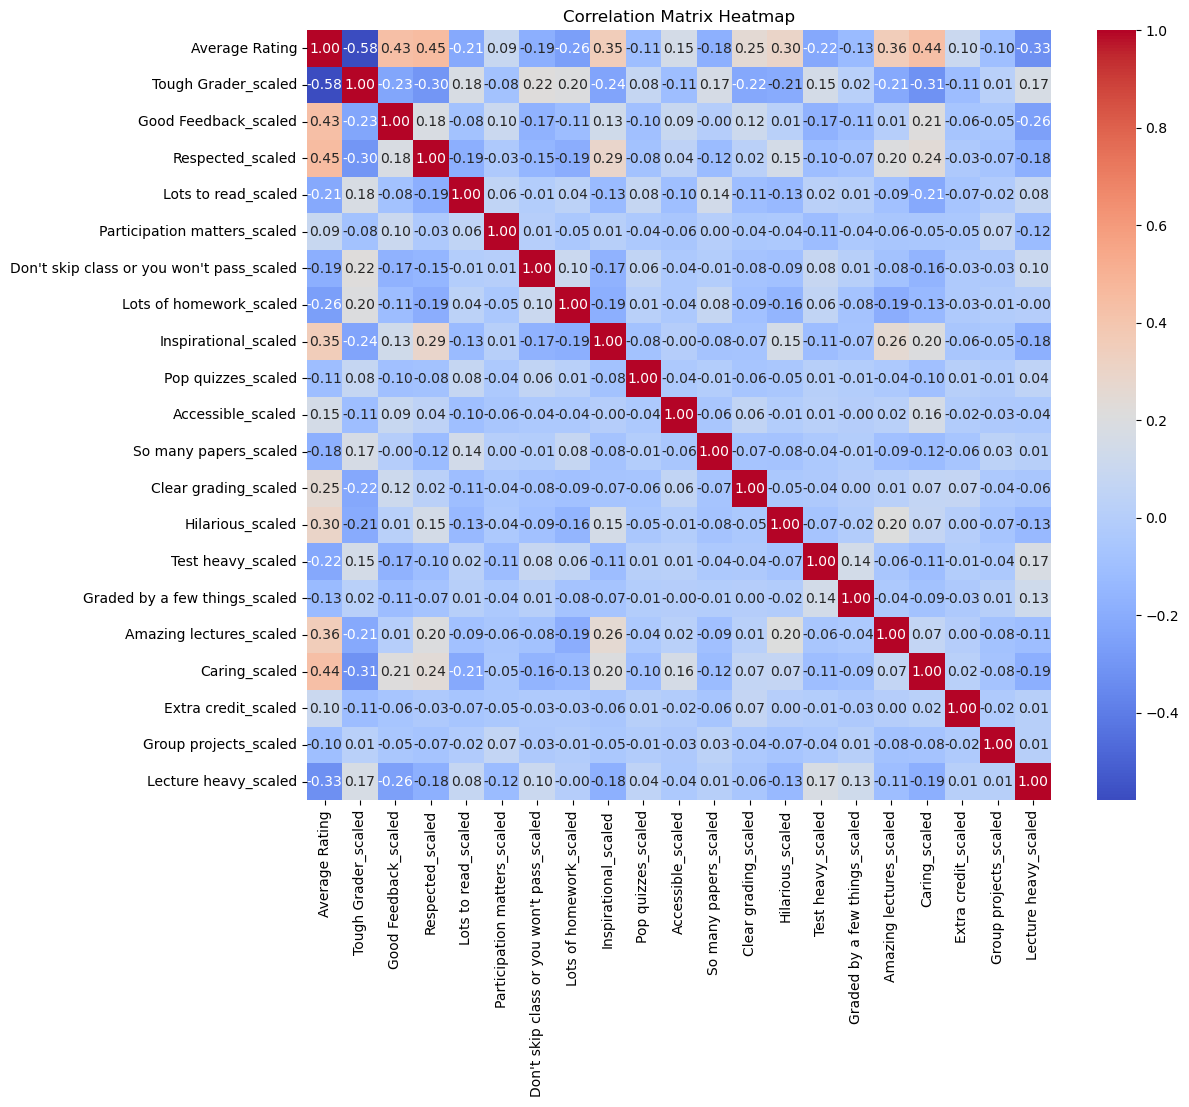

In [431]:
# Compute the correlation matrix
correlation_matrix = df_ml2.corr()

import matplotlib.pyplot as plt
import seaborn as sns

# Plot the heatmap
plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap="coolwarm", cbar=True)
plt.title("Correlation Matrix Heatmap")
plt.show()

In [432]:
# Select predictors (exclude the target variable)
X = df_ml2.drop(columns=["Average Rating"])

# Calculate VIF for each predictor
vif_data = pd.DataFrame({
    "Variable": X.columns,
    "VIF": [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
})

print(vif_data)


                                     Variable       VIF
0                         Tough Grader_scaled  1.850831
1                        Good Feedback_scaled  2.148320
2                            Respected_scaled  1.912134
3                         Lots to read_scaled  1.492575
4                Participation matters_scaled  1.600648
5   Don't skip class or you won't pass_scaled  1.640301
6                     Lots of homework_scaled  1.485216
7                        Inspirational_scaled  1.624260
8                          Pop quizzes_scaled  1.106138
9                           Accessible_scaled  1.311031
10                      So many papers_scaled  1.163317
11                       Clear grading_scaled  1.551100
12                           Hilarious_scaled  1.391238
13                          Test heavy_scaled  1.206875
14              Graded by a few things_scaled  1.158114
15                    Amazing lectures_scaled  1.540153
16                              Caring_scaled  2

In [433]:
# Define features and target
X = df_ml2[tag_columns]  # Replace `tags_columns` with the actual list of tag columns
y = df_ml2['Average Rating']

# Split data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=random_seed)

# Train the model
model = LinearRegression()
model.fit(X_train, y_train)

# Make predictions
y_pred = model.predict(X_test)

# Calculate performance metrics
rmse = root_mean_squared_error(y_test, y_pred)  # RMSE
r_squared = r2_score(y_test, y_pred)  # R-squared

# Output the metrics
print(f"RMSE: {rmse}")
print(f"R-squared: {r_squared}")

RMSE: 0.5854273147273056
R-squared: 0.6561789026863921


In [434]:
coefficients = pd.DataFrame({
    'Tag': X.columns,
    'Coefficient': model.coef_
}).sort_values(by='Coefficient', ascending=False)

print(coefficients)

                                          Tag  Coefficient
15                    Amazing lectures_scaled     0.134274
1                        Good Feedback_scaled     0.117448
2                            Respected_scaled     0.111432
11                       Clear grading_scaled     0.103745
16                              Caring_scaled     0.101543
12                           Hilarious_scaled     0.092161
6                        Inspirational_scaled     0.075670
9                           Accessible_scaled     0.065102
17                        Extra credit_scaled     0.057729
4                Participation matters_scaled     0.045286
7   Don't skip class or you won't pass_scaled     0.023772
8                          Pop quizzes_scaled     0.003429
3                         Lots to read_scaled     0.002234
5                     Lots of homework_scaled    -0.014351
18                      Group projects_scaled    -0.023527
10                      So many papers_scaled    -0.0477

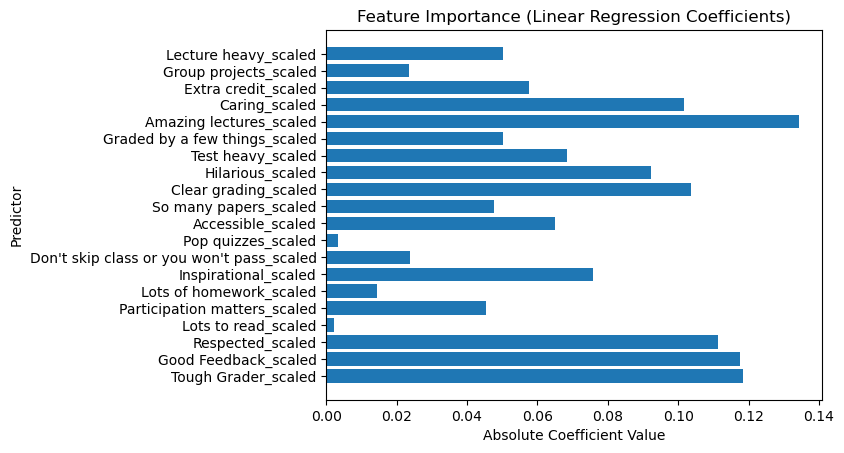

In [435]:
coefficients = model.coef_
predictors = X_train.columns
abs_coefficients = np.abs(coefficients)

plt.barh(predictors, abs_coefficients)
plt.xlabel("Absolute Coefficient Value")
plt.ylabel("Predictor")
plt.title("Feature Importance (Linear Regression Coefficients)")
plt.show()

### Question 9:

 Build a regression model predicting average difficulty from all tags (the ones in the rmpCapstoneTags.csv) file. Make sure to include the R2and RMSE of this model. Which of these tags is most strongly predictive of average difficulty?

In [436]:
df_ml3 = merged_df.drop(columns=["Average Rating", "Number of ratings", "Received a 'pepper'?", "Proportion of students who said they would take the class again", "Number of ratings from online classes", "Male", "Female", 
                                 "Non-Binary", "Tough Grader", "Good Feedback", "Respected", "Lots to read", "Participation matters", "Don't skip class or you won't pass", "Lots of homework", "Inspirational", "Pop quizzes", 
                                 "Accessible", "So many papers", "Clear grading", "Hilarious", "Test heavy", "Graded by a few things", "Amazing lectures", "Caring", "Extra credit", "Group projects", "Lecture heavy"])

df_ml3

,Average Difficulty,Tough Grader_scaled,Good Feedback_scaled,Respected_scaled,Lots to read_scaled,Participation matters_scaled,Don't skip class or you won't pass_scaled,Lots of homework_scaled,Inspirational_scaled,Pop quizzes_scaled,...,So many papers_scaled,Clear grading_scaled,Hilarious_scaled,Test heavy_scaled,Graded by a few things_scaled,Amazing lectures_scaled,Caring_scaled,Extra credit_scaled,Group projects_scaled,Lecture heavy_scaled
2,3.0,4.132119,2.066059,4.132119,2.066059,0.000000,8.264237,4.132119,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.0,0.000000,0.000000
3,3.5,4.958542,2.479271,0.000000,0.000000,1.652847,3.305695,1.652847,0.826424,0.000000,...,0.000000,1.652847,0.826424,0.000000,0.0,0.000000,0.000000,0.0,0.826424,0.000000
5,3.3,3.005177,4.883413,0.375647,1.126941,0.751294,1.126941,0.751294,0.375647,0.000000,...,0.000000,2.629530,1.126941,0.000000,0.0,0.000000,1.126941,0.0,0.375647,1.126941
8,4.5,2.066059,2.066059,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,2.066059,0.000000,0.000000,0.0,0.000000,0.000000,0.0,0.000000,2.066059
18,1.7,0.000000,5.509491,0.000000,0.000000,2.754746,0.000000,0.000000,0.000000,2.754746,...,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,2.754746,0.0,0.000000,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
89876,2.8,0.000000,0.000000,2.066059,0.000000,0.000000,0.000000,0.000000,0.000000,4.132119,...,2.066059,2.066059,2.066059,0.000000,0.0,2.066059,0.000000,0.0,2.066059,0.000000
89877,3.4,2.479271,0.000000,0.826424,0.000000,0.000000,0.826424,4.958542,0.826424,0.826424,...,0.000000,0.826424,1.652847,1.652847,0.0,0.826424,2.479271,0.0,0.000000,0.826424
89885,3.8,4.132119,0.000000,0.000000,6.198178,0.000000,2.066059,0.000000,2.066059,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.0,2.066059,2.066059,0.0,0.000000,0.000000
89890,1.7,0.000000,4.132119,1.377373,1.377373,2.754746,1.377373,0.000000,0.000000,0.000000,...,0.000000,0.000000,5.509491,0.000000,0.0,1.377373,0.000000,0.0,0.000000,0.000000


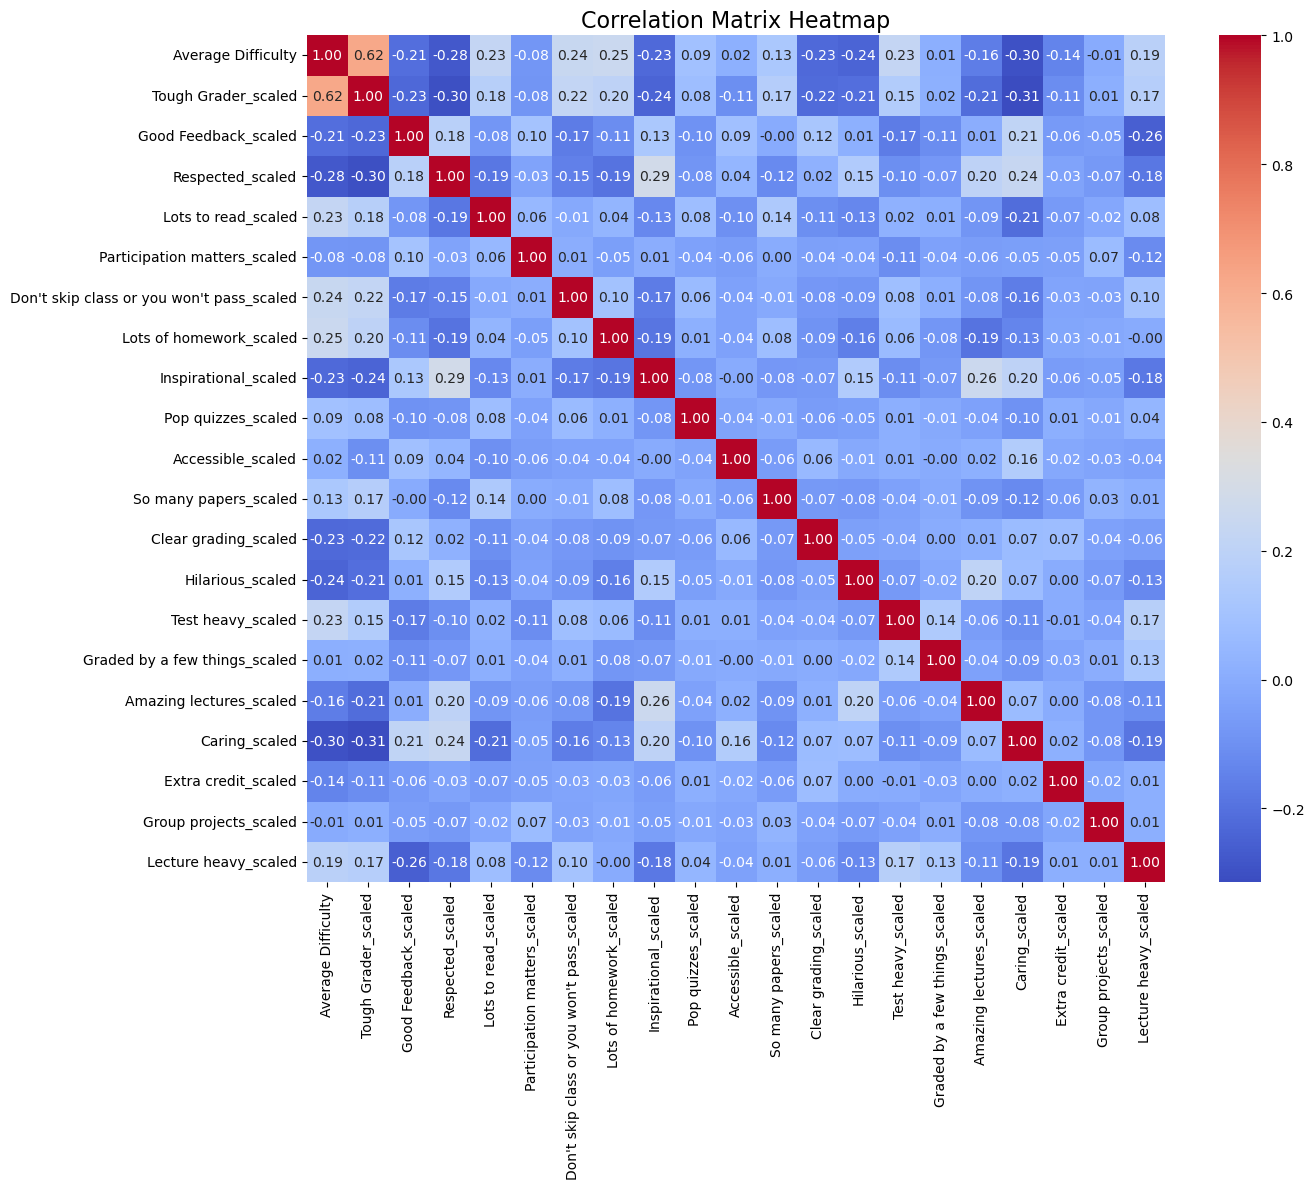

In [437]:
# Compute the correlation matrix
correlation_matrix = df_ml3.corr()

# Plot the heatmap
plt.figure(figsize=(14, 12))  
sns.heatmap(
    correlation_matrix,
    annot=True,           
    fmt=".2f",             
    cmap="coolwarm",      
    cbar=True,             
    annot_kws={"size": 10} 
)
plt.title("Correlation Matrix Heatmap", fontsize=16) 
plt.yticks(fontsize=10)                           
plt.tight_layout()                                  
plt.show()


In [438]:
# Select predictors (exclude the target variable)
X = df_ml3.drop(columns=["Average Difficulty"])

# Calculate VIF for each predictor
vif_data = pd.DataFrame({
    "Variable": X.columns,
    "VIF": [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
})

print(vif_data)

                                     Variable       VIF
0                         Tough Grader_scaled  1.850831
1                        Good Feedback_scaled  2.148320
2                            Respected_scaled  1.912134
3                         Lots to read_scaled  1.492575
4                Participation matters_scaled  1.600648
5   Don't skip class or you won't pass_scaled  1.640301
6                     Lots of homework_scaled  1.485216
7                        Inspirational_scaled  1.624260
8                          Pop quizzes_scaled  1.106138
9                           Accessible_scaled  1.311031
10                      So many papers_scaled  1.163317
11                       Clear grading_scaled  1.551100
12                           Hilarious_scaled  1.391238
13                          Test heavy_scaled  1.206875
14              Graded by a few things_scaled  1.158114
15                    Amazing lectures_scaled  1.540153
16                              Caring_scaled  2

In [439]:
from sklearn.model_selection import train_test_split

X = df_ml3.drop(columns=['Average Difficulty'])
y = df_ml3['Average Difficulty']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=random_seed)

# Train the model
model = LinearRegression()
model.fit(X_train, y_train)

# Make predictions
y_pred = model.predict(X_test)

# Calculate performance metrics
rmse = root_mean_squared_error(y_test, y_pred)  # RMSE
r_squared = r2_score(y_test, y_pred)  # R-squared

# Output the metrics
print(f"RMSE: {rmse}")
print(f"R-squared: {r_squared}")

RMSE: 0.6071579064720711
R-squared: 0.4855888049102083


In [440]:
coefficients = pd.DataFrame({
    'Tag': X.columns,
    'Coefficient': model.coef_
}).sort_values(by='Coefficient', ascending=False)

print(coefficients)

                                          Tag  Coefficient
0                         Tough Grader_scaled     0.193613
13                          Test heavy_scaled     0.140256
9                           Accessible_scaled     0.089205
3                         Lots to read_scaled     0.046268
6                     Lots of homework_scaled     0.045561
5   Don't skip class or you won't pass_scaled     0.043155
8                          Pop quizzes_scaled     0.019207
19                       Lecture heavy_scaled     0.019201
10                      So many papers_scaled     0.017222
15                    Amazing lectures_scaled     0.013789
1                        Good Feedback_scaled    -0.009970
18                      Group projects_scaled    -0.012149
4                Participation matters_scaled    -0.016254
7                        Inspirational_scaled    -0.018277
2                            Respected_scaled    -0.019960
16                              Caring_scaled    -0.0354

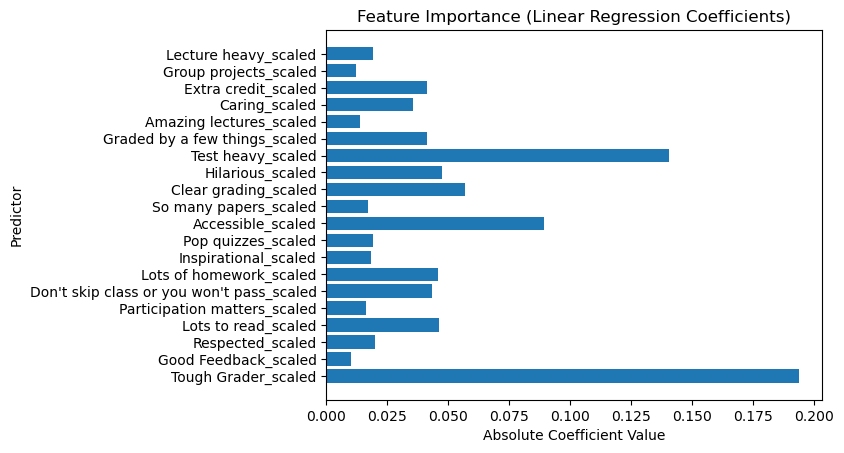

In [441]:
import numpy as np

coefficients = model.coef_
predictors = X_train.columns
abs_coefficients = np.abs(coefficients)

plt.barh(predictors, abs_coefficients)
plt.xlabel("Absolute Coefficient Value")
plt.ylabel("Predictor")
plt.title("Feature Importance (Linear Regression Coefficients)")
plt.show()


### Question 10 

 Build a classification model that predicts whether a professor receives a “pepper” from all available factors(both tags and numerical). Make sure to include model quality metrics such as AU(RO)C and also address class imbalanceconcerns.

In [442]:
df_ml4 = merged_df.drop(columns=["Tough Grader", "Good Feedback", "Respected", "Lots to read", "Participation matters", "Don't skip class or you won't pass", "Lots of homework", "Inspirational", "Pop quizzes", 
                                 "Accessible", "So many papers", "Clear grading", "Hilarious", "Test heavy", "Graded by a few things", "Amazing lectures", "Caring", "Extra credit", "Group projects", "Lecture heavy"])

In [443]:
df_ml4

,Average Rating,Average Difficulty,Number of ratings,Received a 'pepper'?,Proportion of students who said they would take the class again,Number of ratings from online classes,Male,Female,Non-Binary,Tough Grader_scaled,...,So many papers_scaled,Clear grading_scaled,Hilarious_scaled,Test heavy_scaled,Graded by a few things_scaled,Amazing lectures_scaled,Caring_scaled,Extra credit_scaled,Group projects_scaled,Lecture heavy_scaled
2,3.2,3.0,4.0,0.0,NaN,0.0,1,0,0,4.132119,...,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.0,0.000000,0.000000
3,3.6,3.5,10.0,1.0,NaN,0.0,0,0,1,4.958542,...,0.000000,1.652847,0.826424,0.000000,0.0,0.000000,0.000000,0.0,0.826424,0.000000
5,3.5,3.3,22.0,0.0,56.0,7.0,1,0,0,3.005177,...,0.000000,2.629530,1.126941,0.000000,0.0,0.000000,1.126941,0.0,0.375647,1.126941
8,2.6,4.5,4.0,1.0,NaN,0.0,0,0,1,2.066059,...,0.000000,2.066059,0.000000,0.000000,0.0,0.000000,0.000000,0.0,0.000000,2.066059
18,4.2,1.7,3.0,1.0,NaN,0.0,0,1,0,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,2.754746,0.0,0.000000,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
89876,2.8,2.8,4.0,0.0,NaN,0.0,0,0,1,0.000000,...,2.066059,2.066059,2.066059,0.000000,0.0,2.066059,0.000000,0.0,2.066059,0.000000
89877,3.6,3.4,10.0,0.0,50.0,1.0,1,0,0,2.479271,...,0.000000,0.826424,1.652847,1.652847,0.0,0.826424,2.479271,0.0,0.000000,0.826424
89885,3.9,3.8,4.0,1.0,NaN,0.0,0,1,0,4.132119,...,0.000000,0.000000,0.000000,0.000000,0.0,2.066059,2.066059,0.0,0.000000,0.000000
89890,5.0,1.7,6.0,1.0,100.0,2.0,1,0,0,0.000000,...,0.000000,0.000000,5.509491,0.000000,0.0,1.377373,0.000000,0.0,0.000000,0.000000


In [444]:
# Separate data with and without nulls
train_data = df_ml4[df_ml4["Proportion of students who said they would take the class again"].notnull()]
test_data = df_ml4[df_ml4["Proportion of students who said they would take the class again"].isnull()]

# Define predictors and target for imputation model
X_train = train_data.drop(columns=["Proportion of students who said they would take the class again", "Average Rating"])
y_train = train_data["Proportion of students who said they would take the class again"]

X_test = test_data.drop(columns=["Proportion of students who said they would take the class again", "Average Rating"])

# Train a Random Forest Regressor
rf_imputer = RandomForestRegressor(random_state=random_seed)
rf_imputer.fit(X_train, y_train)

# Predict missing values
test_data["Proportion of students who said they would take the class again"] = rf_imputer.predict(X_test)

# Combine data
df_ml4 = pd.concat([train_data, test_data])


C:\Users\Nancy Lonoff\AppData\Local\Temp\ipykernel_55044\1407294195.py:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test_data["Proportion of students who said they would take the class again"] = rf_imputer.predict(X_test)


In [445]:
X = df_ml4.drop(columns=["Received a 'pepper'?"])  
y = df_ml4["Received a 'pepper'?"]

In [446]:
# Compute VIF for each predictor
vif_data = pd.DataFrame()
vif_data["Feature"] = X.columns
vif_data["VIF"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]

print(vif_data)


                                              Feature        VIF
0                                      Average Rating  45.737220
1                                  Average Difficulty  16.623484
2                                   Number of ratings   1.838760
3   Proportion of students who said they would tak...  47.622981
4               Number of ratings from online classes   1.234878
5                                                Male   4.225597
6                                              Female   3.715039
7                                          Non-Binary   2.648531
8                                 Tough Grader_scaled   3.263587
9                                Good Feedback_scaled   2.922783
10                                   Respected_scaled   2.376088
11                                Lots to read_scaled   1.691064
12                       Participation matters_scaled   1.837911
13          Don't skip class or you won't pass_scaled   1.865102
14                       

In [447]:
# Standardize predictors
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)  

# Apply PCA to retain components explaining 95% of variance
pca = PCA(n_components=0.95)
X_pca = pca.fit_transform(X_scaled)

# Check the number of components retained
print(f"Original dimensions: {X_scaled.shape[1]}, Reduced dimensions: {X_pca.shape[1]}")

X_train, X_test, y_train, y_test = train_test_split(X_pca, y, test_size=0.3, random_state=random_seed)


# Train logistic regression
model = LogisticRegression(random_state=random_seed, class_weight='balanced')
model.fit(X_train, y_train)

# Make predictions
y_pred = model.predict(X_test)
y_pred_prob = model.predict_proba(X_test)[:, 1]

Original dimensions: 28, Reduced dimensions: 24


Classification Report:
               precision    recall  f1-score   support

         0.0       0.82      0.68      0.74      7618
         1.0       0.58      0.74      0.65      4541

    accuracy                           0.70     12159
   macro avg       0.70      0.71      0.70     12159
weighted avg       0.73      0.70      0.71     12159

ROC-AUC Score: 0.7843602719113143


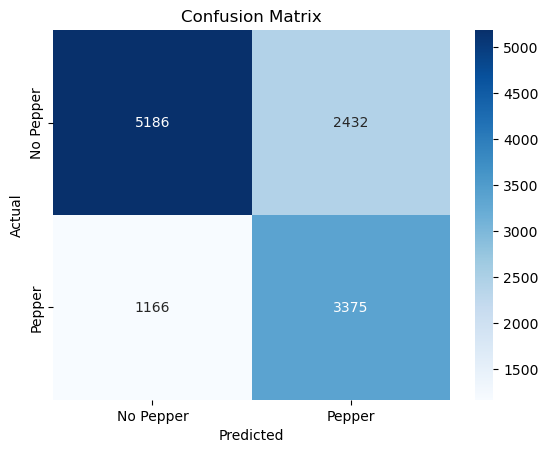

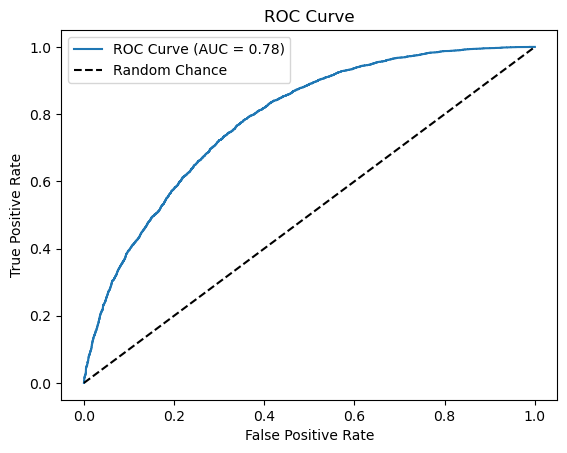

In [448]:
# Classification report
print("Classification Report:\n", classification_report(y_test, y_pred))

# ROC-AUC score
print("ROC-AUC Score:", roc_auc_score(y_test, y_pred_prob))

# Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=["No Pepper", "Pepper"], yticklabels=["No Pepper", "Pepper"])
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()

# ROC Curve
fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob)
plt.plot(fpr, tpr, label="ROC Curve (AUC = {:.2f})".format(roc_auc_score(y_test, y_pred_prob)))
plt.plot([0, 1], [0, 1], "k--", label="Random Chance")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve")
plt.legend()
plt.show()


In [449]:
# Calculate the class proportions
class_counts = df_ml4["Received a 'pepper'?"].value_counts(normalize=True)

# Print the proportions for each class
print("Class proportions:")
print(class_counts)

# Identify the majority class
majority_class = class_counts.idxmax()
majority_class_proportion = class_counts.max()

Class proportions:
Received a 'pepper'?
0.0    0.623816
1.0    0.376184
Name: proportion, dtype: float64
